# Peak Detection
This notebook is made for detecting peaks of the snippets extracted in module 2 using the function defined in x


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import pyarrow.feather as feather
from tqdm import tqdm

In [2]:
%run "3.0 - Functions_peakdetection.ipynb"

In [3]:
root = 'G:\My Drive\Molecool\Databases\Database1'
#root = '/Volumes/GoogleDrive/.shortcut-targets-by-id/1sZgDE1M3o-bDINfAQYEXl_vqsKs03WxD/Molecool/Databases/Database1' # Jaume's directoru

In [12]:
patients = sorted(os.listdir(root))

for pat in tqdm(patients): #Looping throught the folder Sxxxx
    if not pat.endswith(('.json', 'ini','\r')):
        path_pat = root+'/'+pat
        folders = sorted(os.listdir(path_pat))
        for folder in folders:    #Looping through the different ecg types 
            if not folder.endswith('.ini') and folder != 'Icon\r':
                path_folder = path_pat + '/' +folder   
                snippets = sorted(os.listdir(path_folder))
                samplingRate = find_rate(path_folder)
                for snip_folder in snippets:  #Looping through the snippet folders
                    if not snip_folder.endswith(('.json', '.ftr', '.ini','\r')):
                        path_snip =path_folder + '/' + snip_folder
                        read_meta(path_snip)
                        read_peaks(path_snip, samplingRate)
                        





  0%|                                                                                           | 0/57 [00:00<?, ?it/s]



  4%|██▉                                                                                | 2/57 [00:04<02:17,  2.50s/it]



  7%|█████▊                                                                             | 4/57 [00:06<01:44,  1.96s/it]



 11%|████████▋                                                                          | 6/57 [00:12<01:59,  2.35s/it]



 12%|██████████▏                                                                        | 7/57 [00:16<02:10,  2.61s/it]



 14%|███████████▋                                                                       | 8/57 [00:23<03:21,  4.11s/it]



 16%|█████████████                                                                      | 9/57 [00:29<03:33,  4.45s/it]



 18%|██████████████▍                                                                   | 10/57 [00:33<03:36,  4.60s/it]



 19%|███████

In [3]:
def read_peaks(path,rate):
    """Function to open snippet files, get peaks, and write them to a new file"""
    df = pd.read_feather(path_snip + '/MSNIP.ftr')   #inputting the ecg feather files in a data frame
    df_peaks = _filteringdet(df['ecg_0'],rate)
    feather.write_feather(df_peaks, (path_snip + '/PEAKS.ftr'))

In [4]:
def read_meta(path):
    """Function that creates a new meta file for peak files"""
#     with open(path + '\ManualMeta.json') as json_file:
#         metaData = json.load(json_file)
#         json_file.close()
    data = {'Error Flag': False, 'Error Type': 'No error'}
    with open((path + '/PeakMeta.json'), "w") as outfile:
        json.dump(data, outfile)
        outfile.close()

In [5]:
def find_rate(path):
    """"""
    with open(path + '/Meta.json') as json_file:
        metaData = json.load(json_file)
        json_file.close()
        return int(metaData['Sampling rate'])





  0%|                                                                                           | 0/57 [00:00<?, ?it/s]

In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder Snippet000


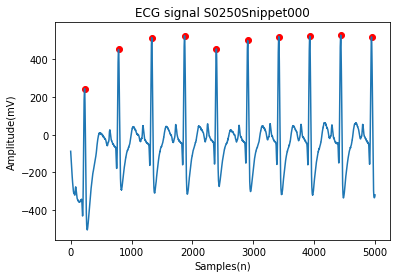

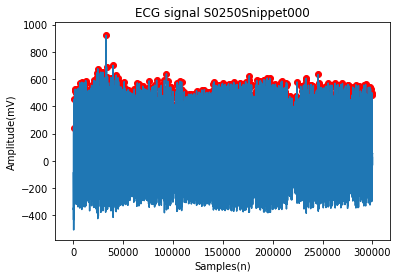

In snippet folder Snippet000 PeakMeta.json
In snippet folder Snippet001


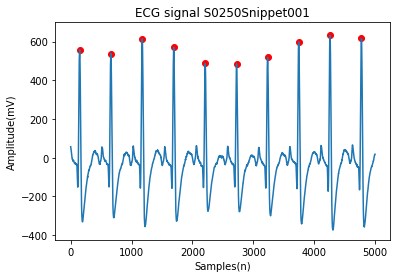

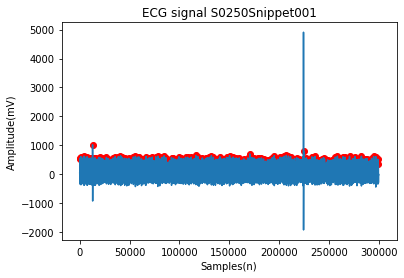

In snippet folder Snippet002


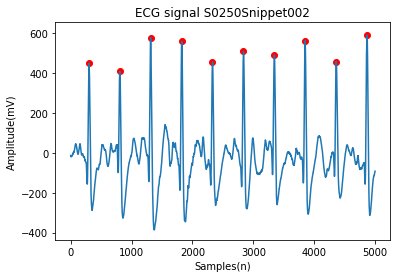

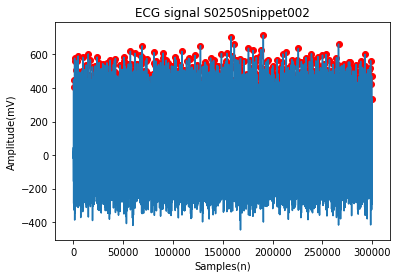





  4%|██▉                                                                                | 2/57 [00:02<01:20,  1.47s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder Snippet000


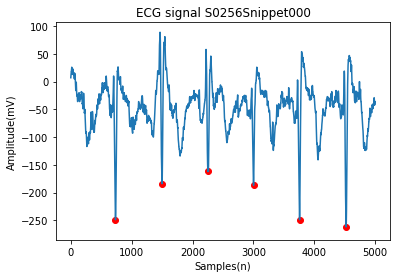

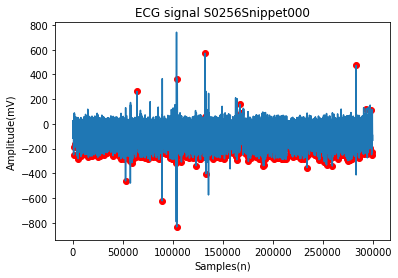





  7%|█████▊                                                                             | 4/57 [00:03<01:02,  1.17s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder Snippet000


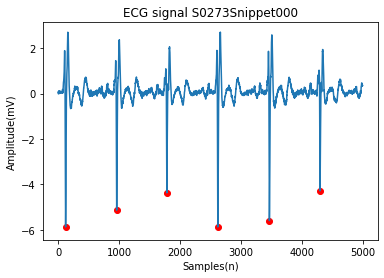

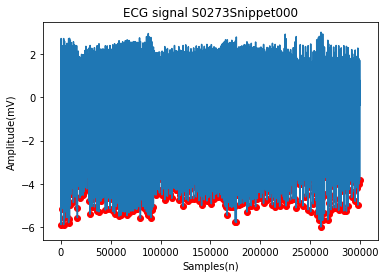

In snippet folder Snippet001


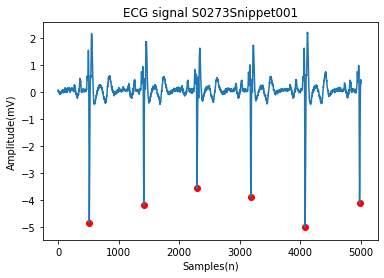

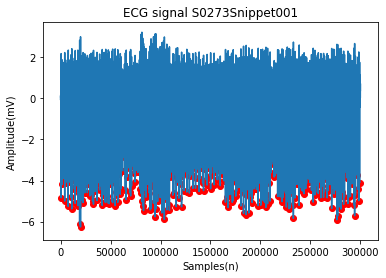

In snippet folder Snippet002


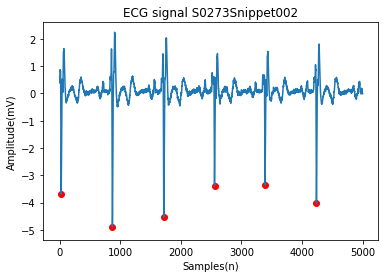

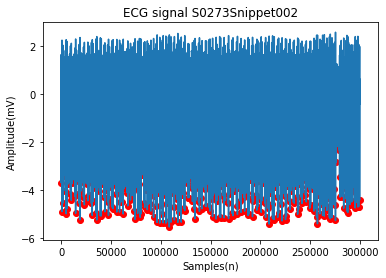

In snippet folder Snippet003


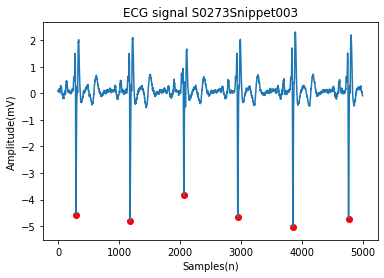

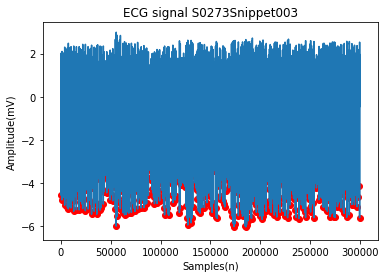

In snippet folder Snippet004


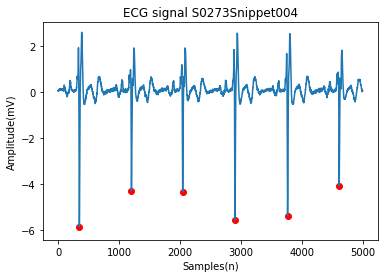

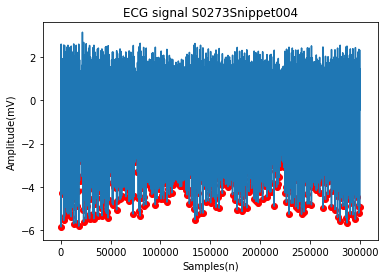





 11%|████████▋                                                                          | 6/57 [00:09<01:24,  1.66s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder Snippet000


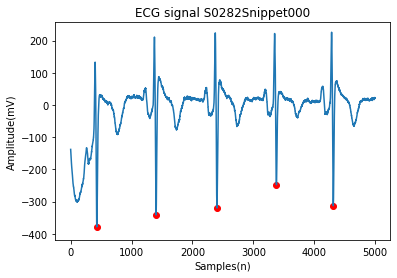

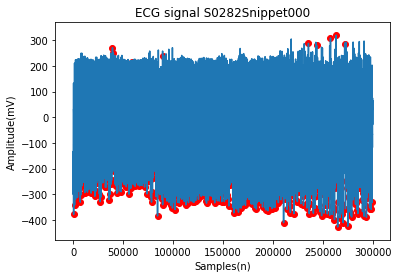

In snippet folder Snippet001


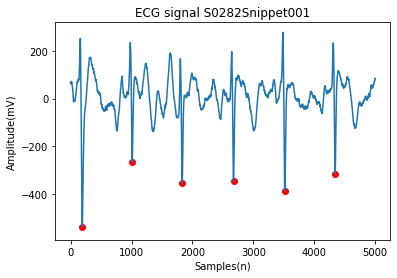

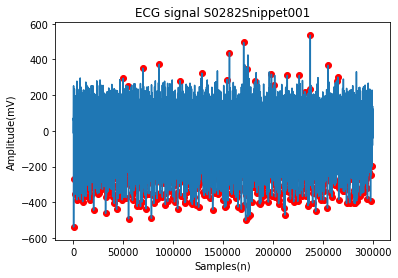

In snippet folder Snippet002


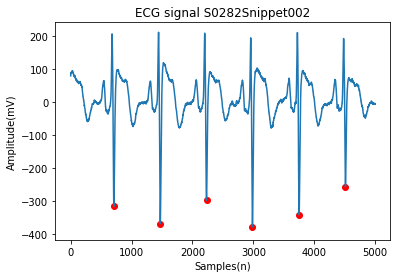

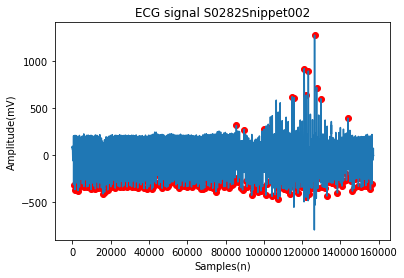





 12%|██████████▏                                                                        | 7/57 [00:12<01:39,  1.99s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder Snippet000


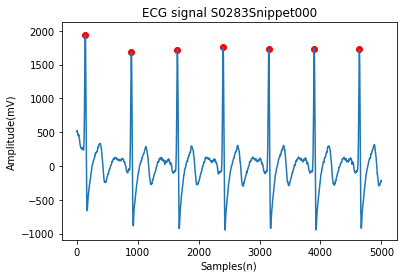

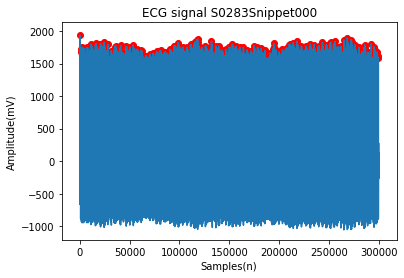

In snippet folder Snippet001


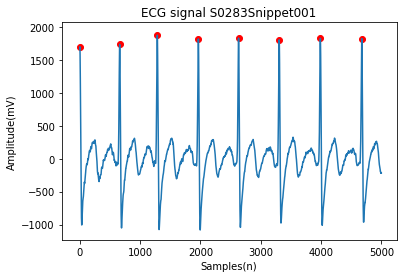

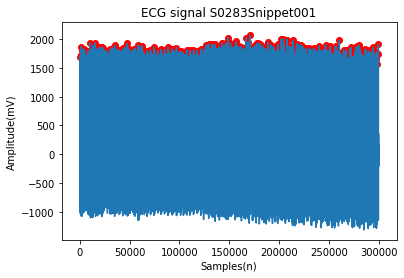

In snippet folder Snippet002


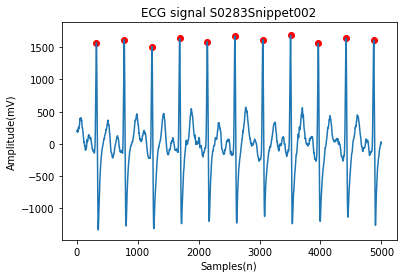

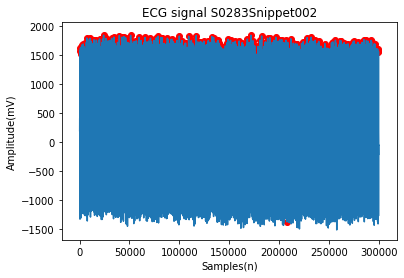

In snippet folder Snippet003


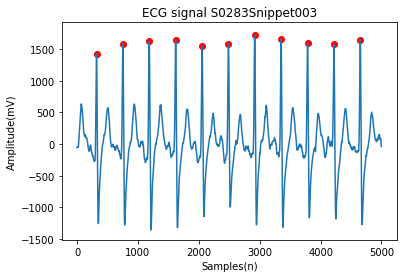

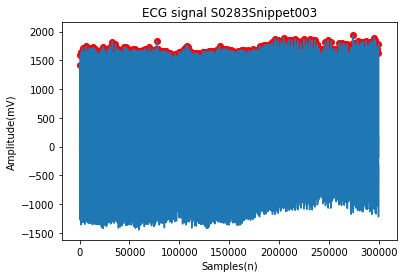





 14%|███████████▋                                                                       | 8/57 [00:16<02:14,  2.75s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder Snippet000


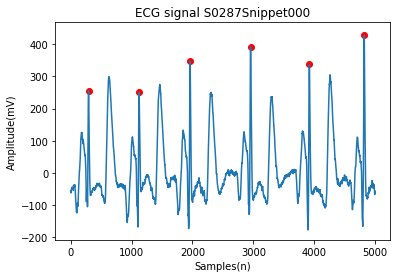

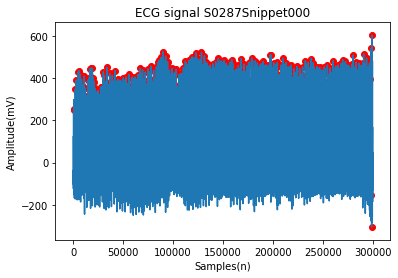

In snippet folder Snippet001


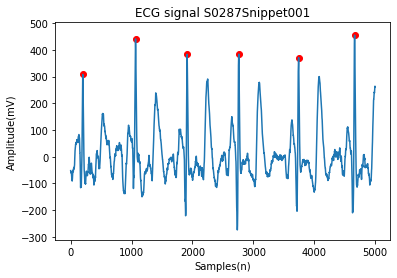

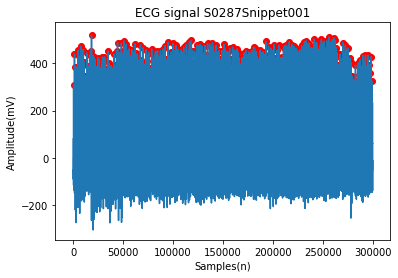

In snippet folder Snippet002


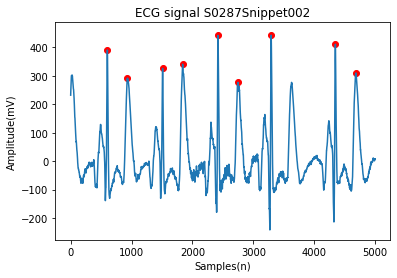

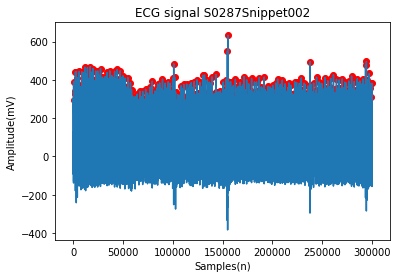





 16%|█████████████                                                                      | 9/57 [00:19<02:14,  2.79s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder Snippet000


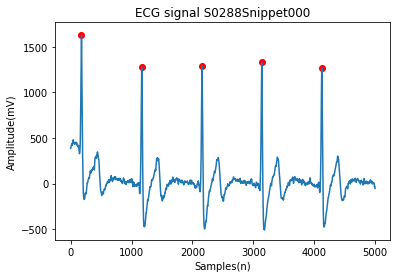

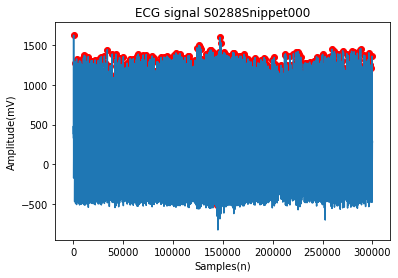

In snippet folder Snippet001


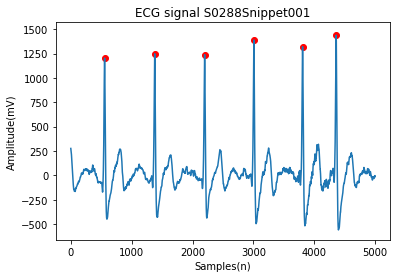

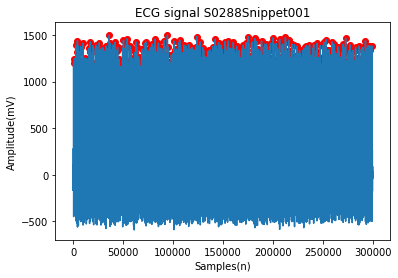

In snippet folder Snippet002


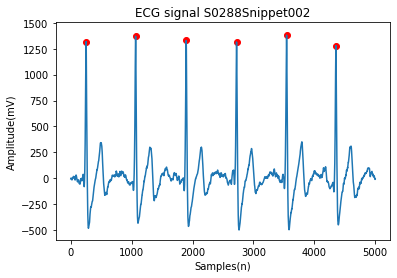

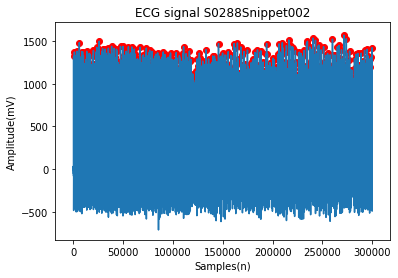





 18%|██████████████▍                                                                   | 10/57 [00:22<02:10,  2.79s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder Snippet000


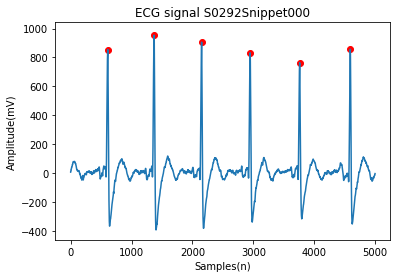

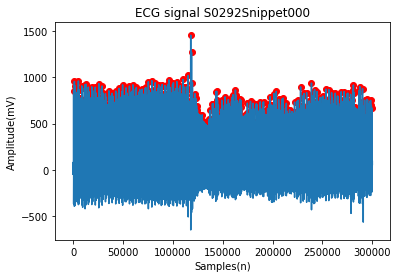

In snippet folder Snippet001


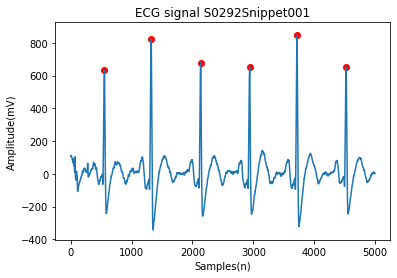

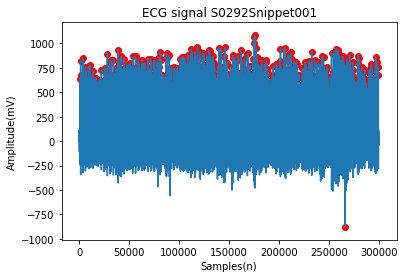





 19%|███████████████▊                                                                  | 11/57 [00:24<02:00,  2.62s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder Snippet000


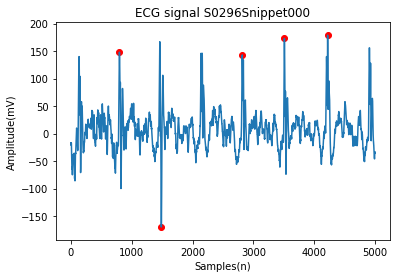

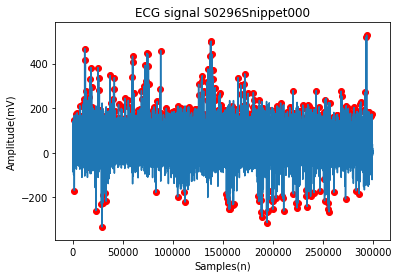

In snippet folder Snippet001


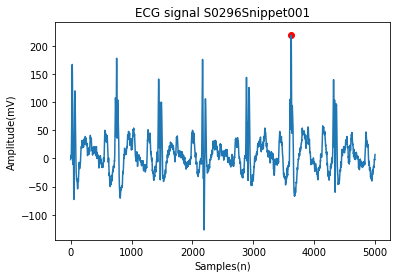

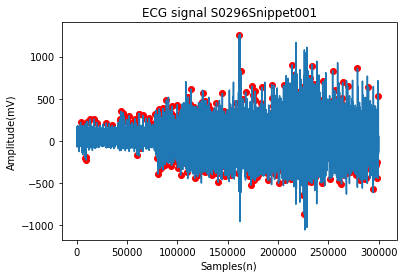

In snippet folder Snippet002


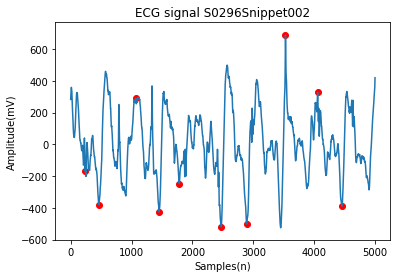

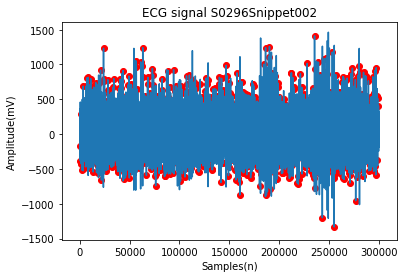





 21%|█████████████████▎                                                                | 12/57 [00:28<02:14,  2.98s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder Snippet000


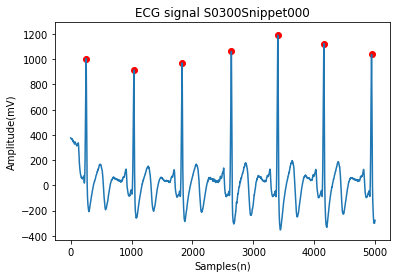

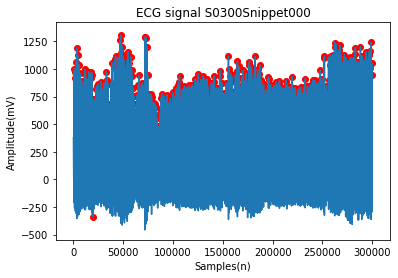

In snippet folder Snippet001


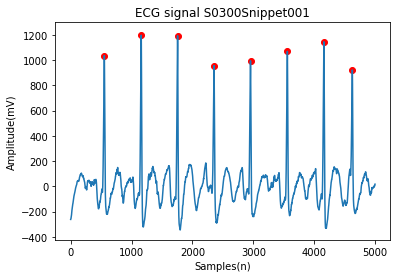

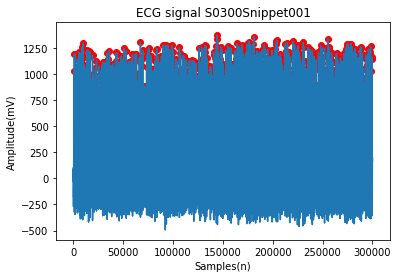

In snippet folder Snippet002


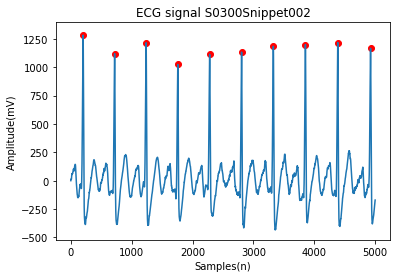

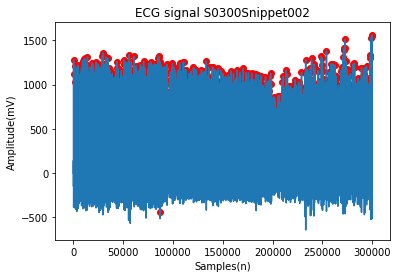





 23%|██████████████████▋                                                               | 13/57 [00:31<02:09,  2.94s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder Snippet000


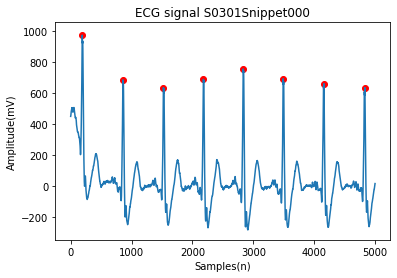

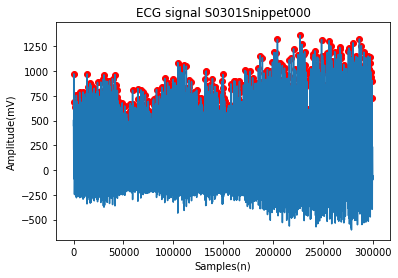

In snippet folder Snippet001


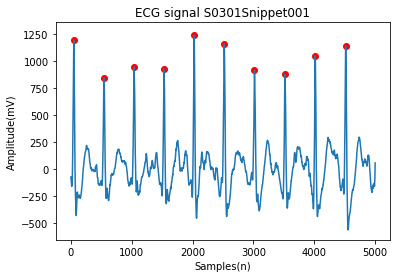

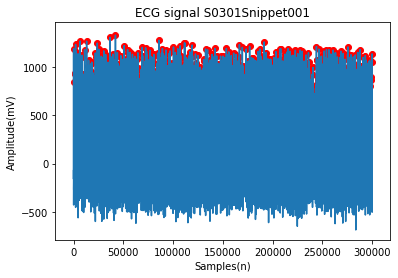

In snippet folder Snippet002


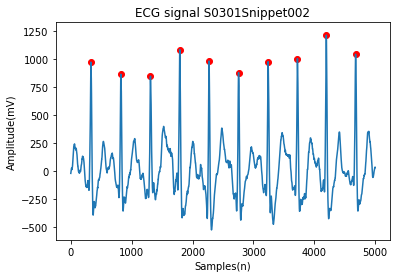

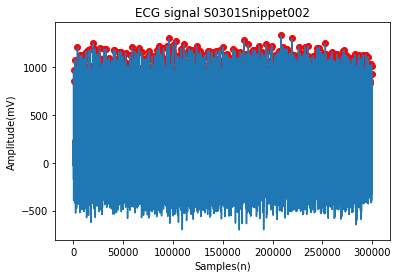





 25%|████████████████████▏                                                             | 14/57 [00:34<02:15,  3.15s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder Snippet000


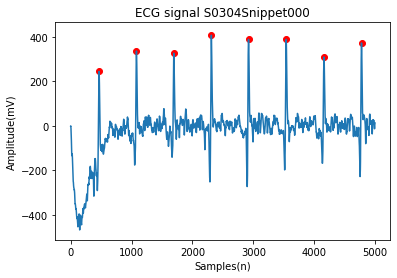

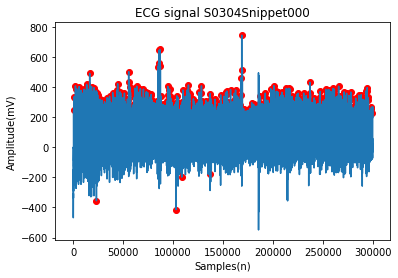





 26%|█████████████████████▌                                                            | 15/57 [00:36<01:52,  2.68s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder Snippet000


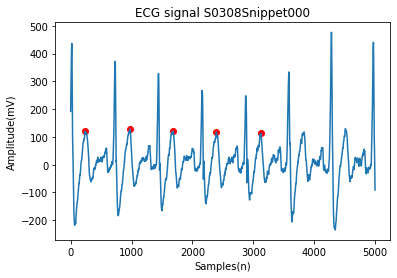

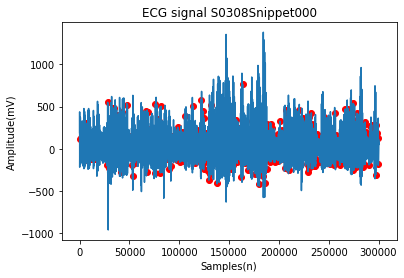





 28%|███████████████████████                                                           | 16/57 [00:37<01:31,  2.22s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder Snippet000


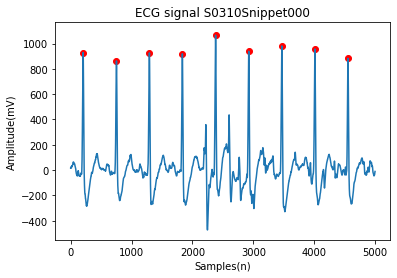

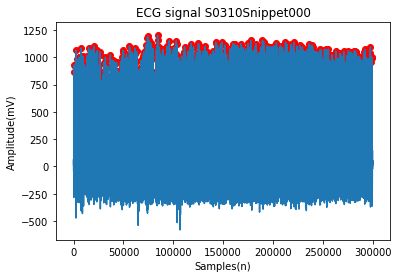

In snippet folder Snippet001


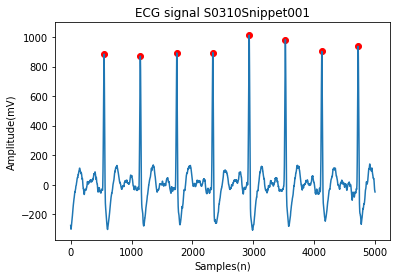

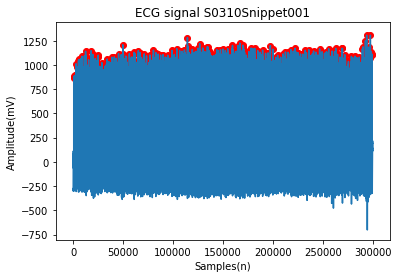

In snippet folder Snippet002


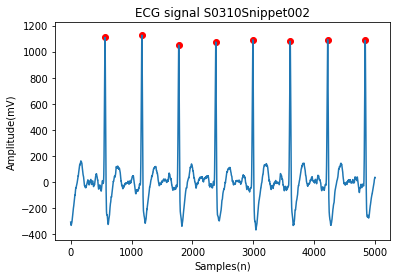

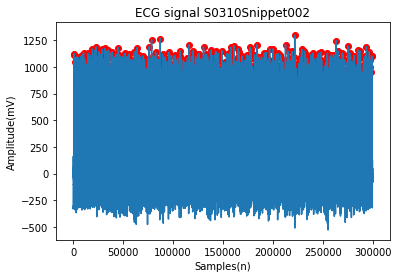

In snippet folder Snippet003


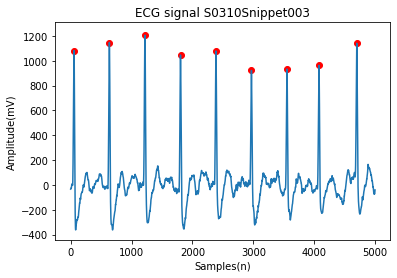

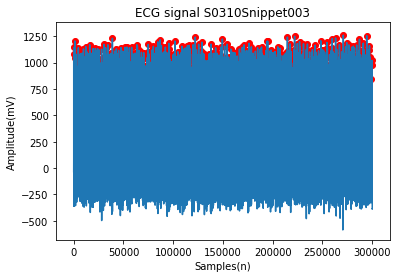

In snippet folder Snippet004


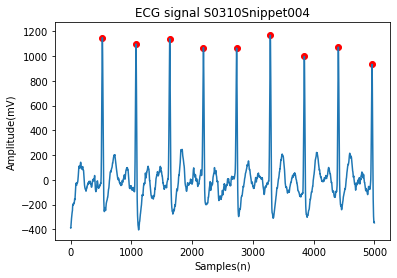

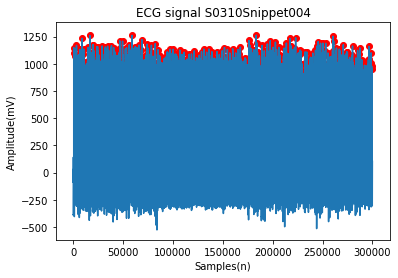





 30%|████████████████████████▍                                                         | 17/57 [00:43<02:14,  3.37s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder Snippet000


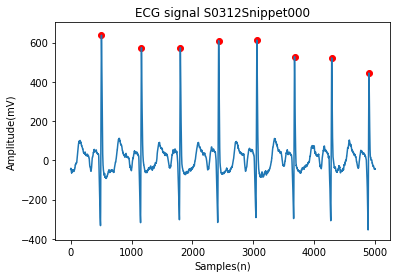

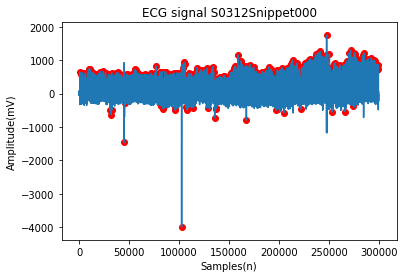





 32%|█████████████████████████▉                                                        | 18/57 [00:44<01:44,  2.68s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder Snippet000


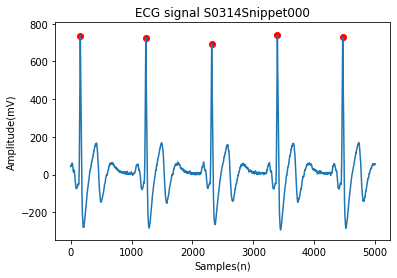

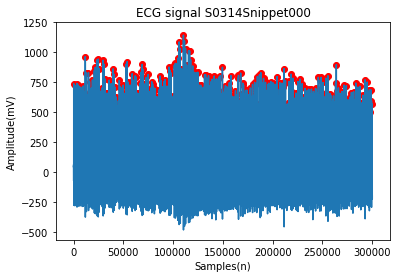

In snippet folder Snippet001


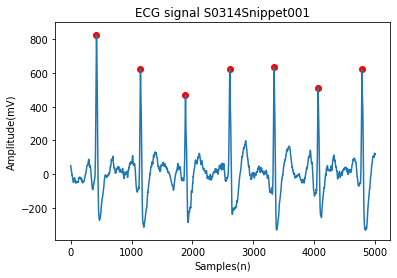

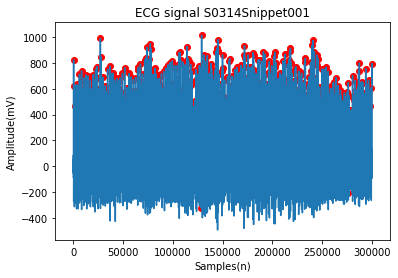





 33%|███████████████████████████▎                                                      | 19/57 [00:47<01:39,  2.63s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder Snippet000


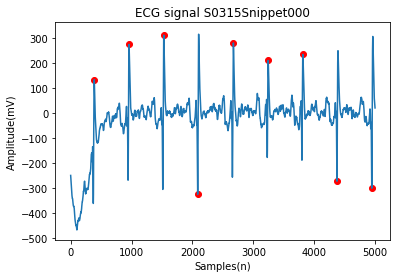

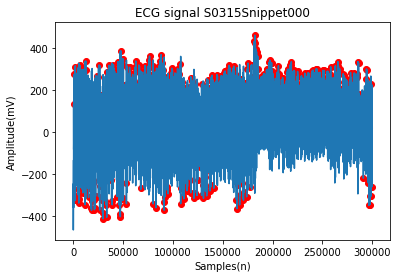





 35%|████████████████████████████▊                                                     | 20/57 [00:48<01:21,  2.21s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder Snippet000


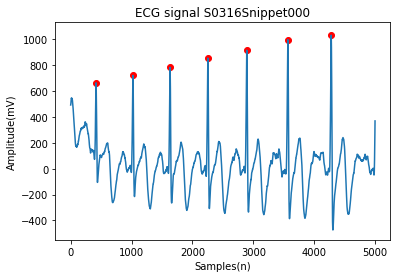

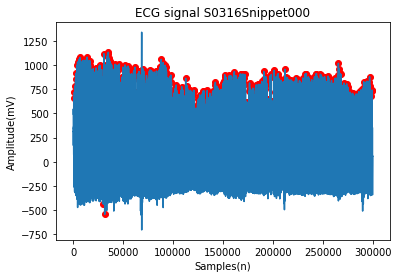

In snippet folder Snippet001


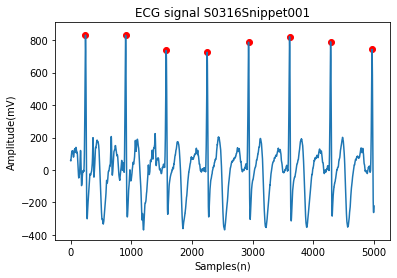

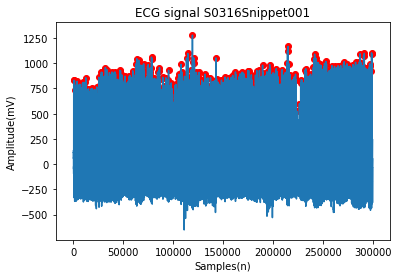

In snippet folder Snippet002


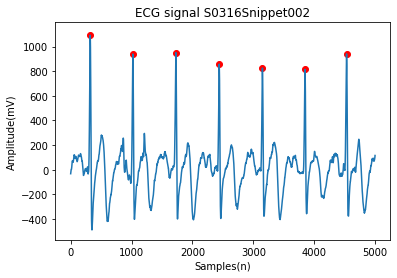

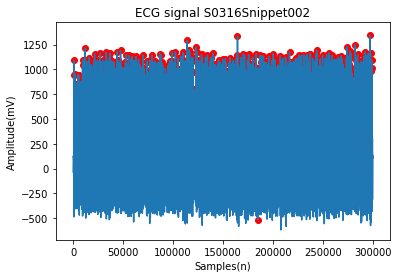

In snippet folder Snippet003


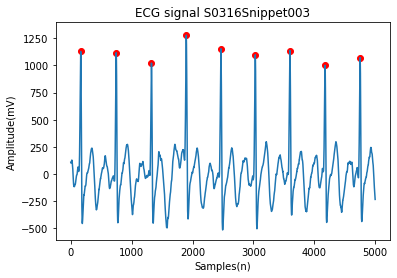

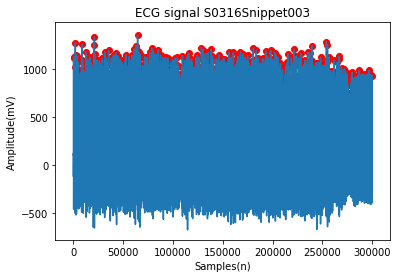





 37%|██████████████████████████████▏                                                   | 21/57 [00:53<01:44,  2.90s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder Snippet000


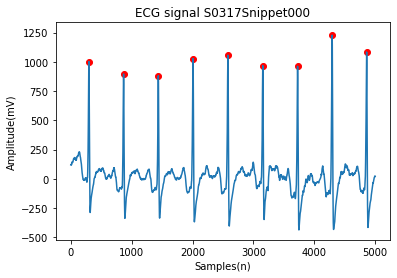

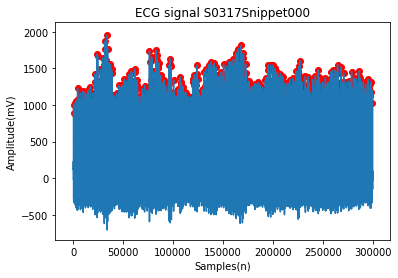

In snippet folder Snippet001


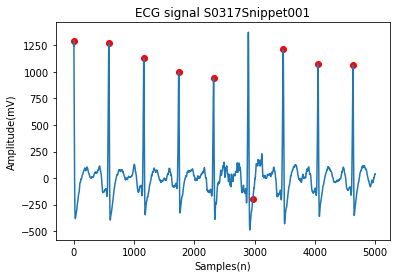

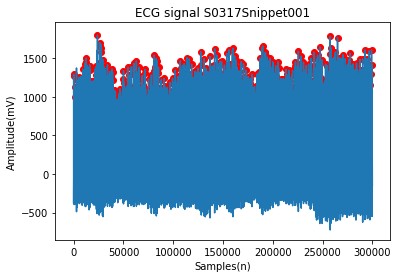

In snippet folder Snippet002


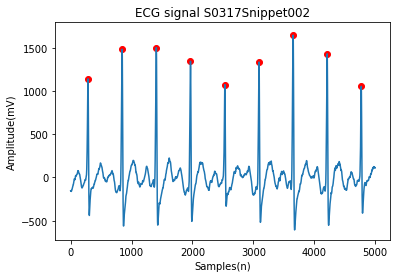

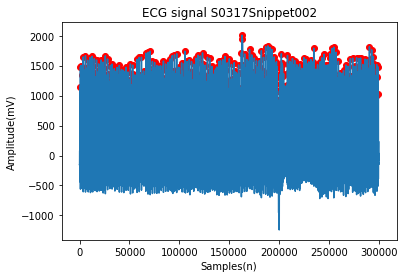

In snippet folder Snippet003


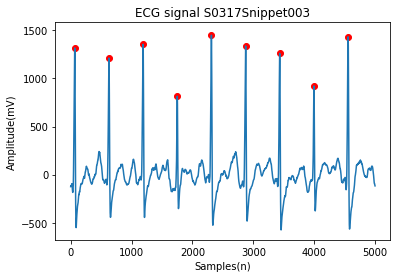

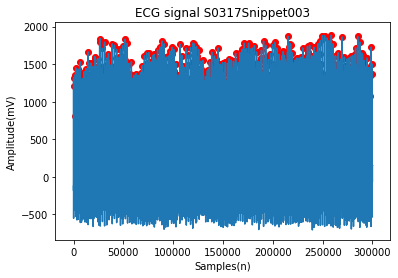





 39%|███████████████████████████████▋                                                  | 22/57 [00:58<02:02,  3.50s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta (1).json
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta (1).json
In snippet folder Meta.json
In snippet folder Snippet000


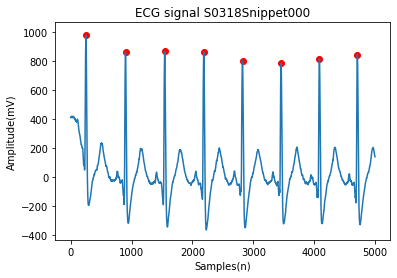

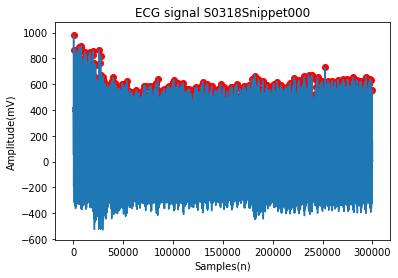

In snippet folder Snippet001


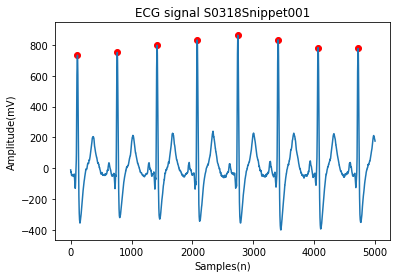

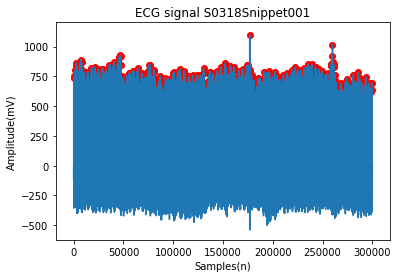

In snippet folder Snippet002


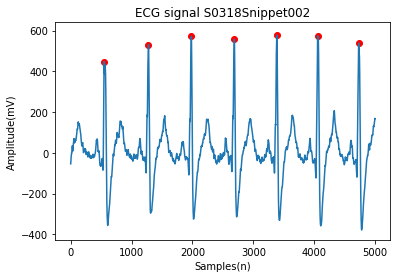

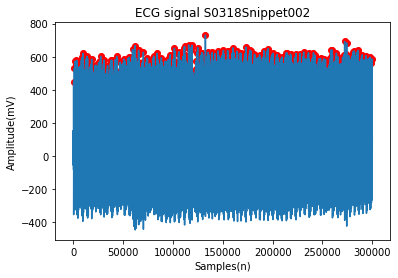





 40%|█████████████████████████████████                                                 | 23/57 [01:02<02:04,  3.67s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta (1).json
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta (1).json
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta (1).json
In snippet folder Meta.json
In snippet folder Snippet000


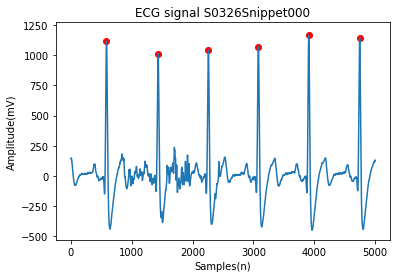

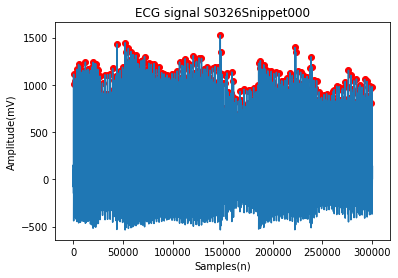

In snippet folder Snippet001


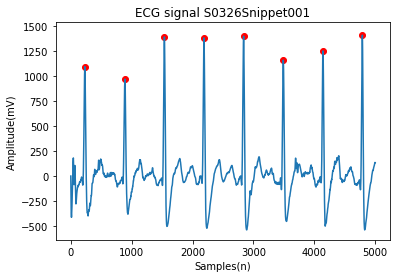

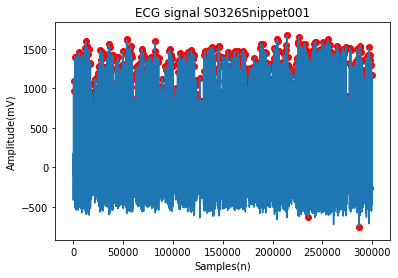

In snippet folder Snippet002


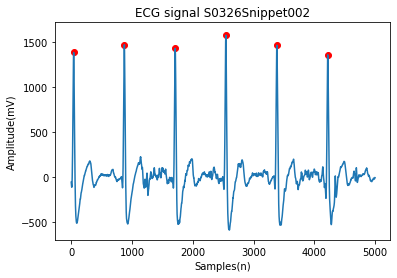

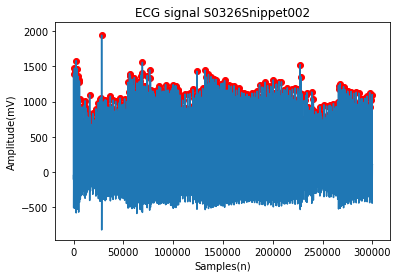





 42%|██████████████████████████████████▌                                               | 24/57 [01:07<02:16,  4.15s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta (1).json
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta (1).json
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta (1).json
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta (1).json
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta (1).json
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder Snippet000


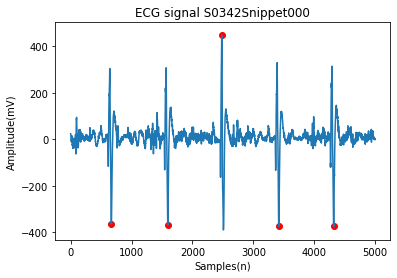

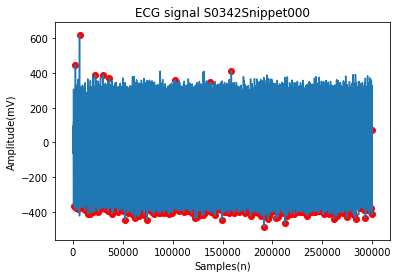

In snippet folder Snippet001


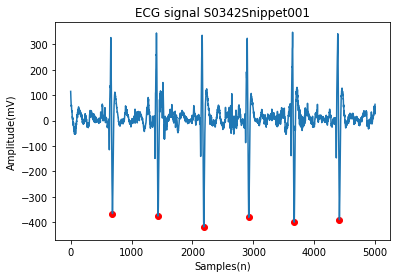

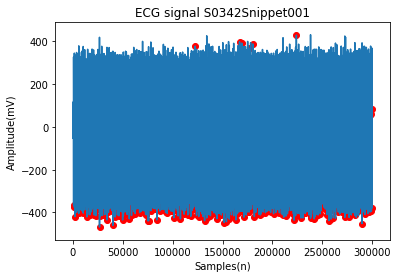





 49%|████████████████████████████████████████▎                                         | 28/57 [01:08<01:27,  3.03s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder Snippet000


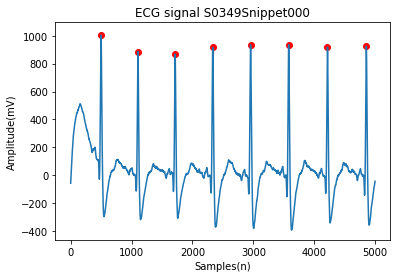

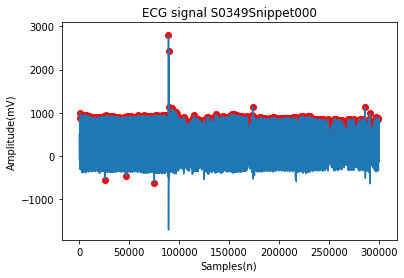





 51%|█████████████████████████████████████████▋                                        | 29/57 [01:10<01:10,  2.52s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder Snippet000


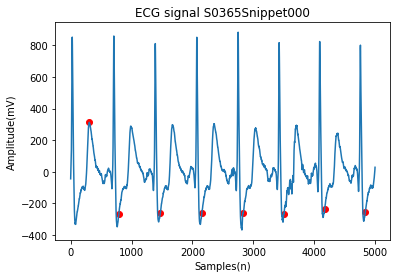

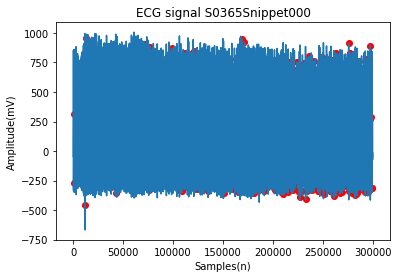

In snippet folder Snippet001


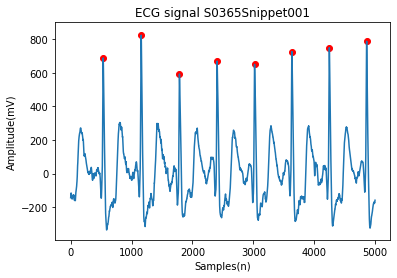

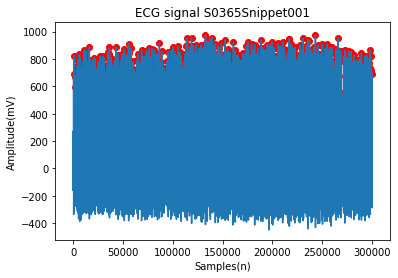

In snippet folder Snippet002


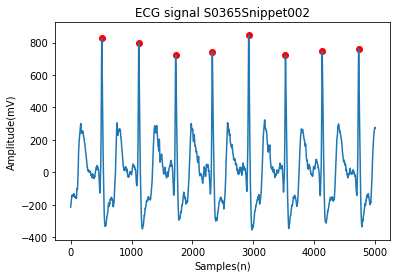

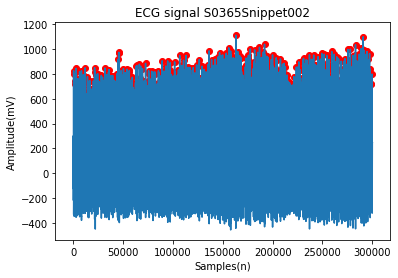





 53%|███████████████████████████████████████████▏                                      | 30/57 [01:13<01:17,  2.87s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder Snippet000


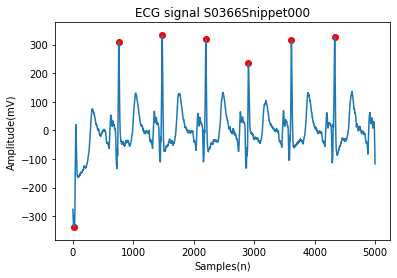

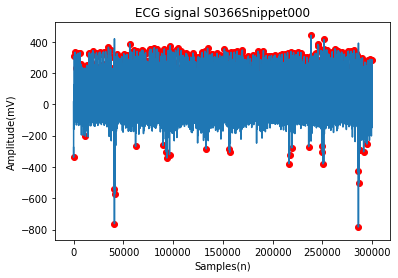

In snippet folder Snippet001


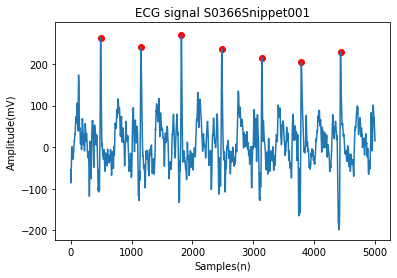

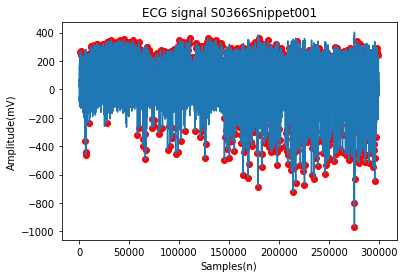

In snippet folder Snippet002


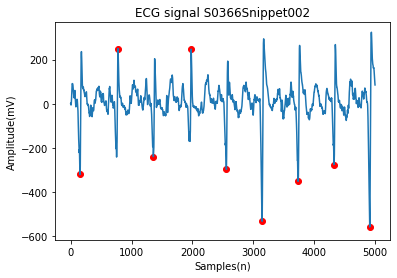

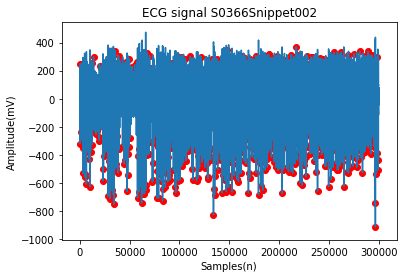

In snippet folder Snippet003


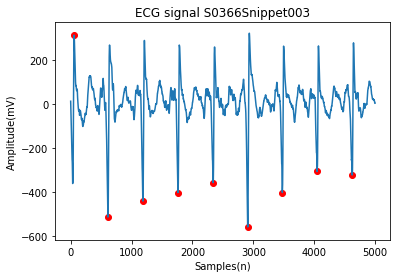

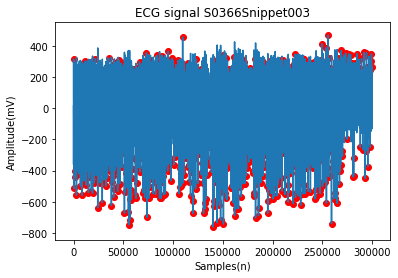





 54%|████████████████████████████████████████████▌                                     | 31/57 [01:18<01:30,  3.47s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder Snippet000


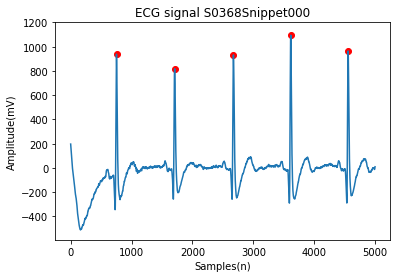

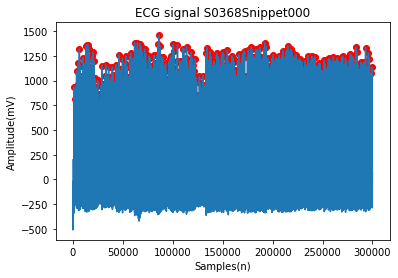

In snippet folder Snippet001


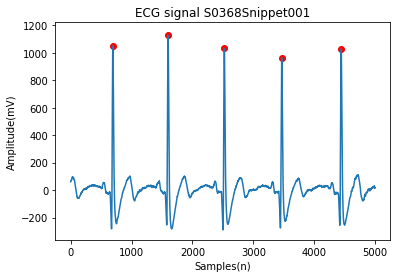

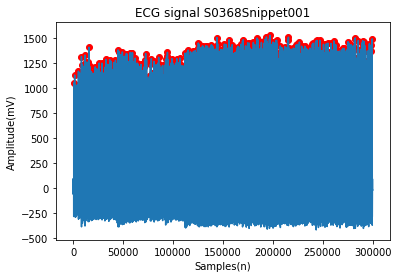

In snippet folder Snippet002


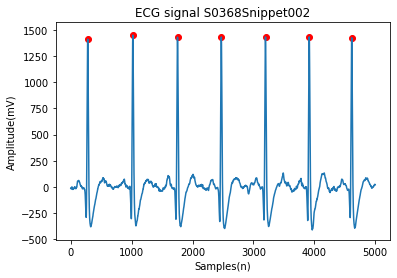

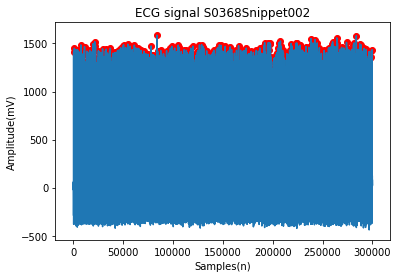





 56%|██████████████████████████████████████████████                                    | 32/57 [01:22<01:29,  3.58s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder Snippet000


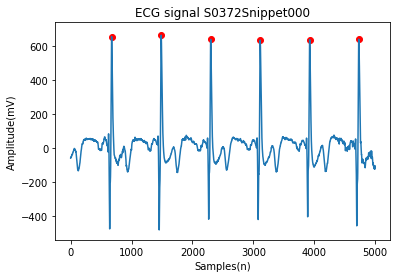

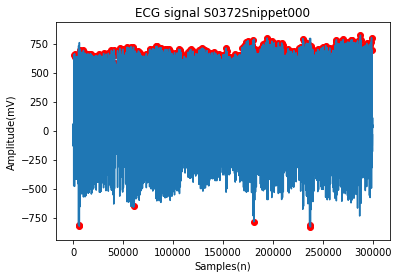

In snippet folder Snippet001


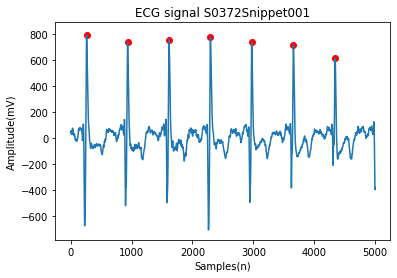

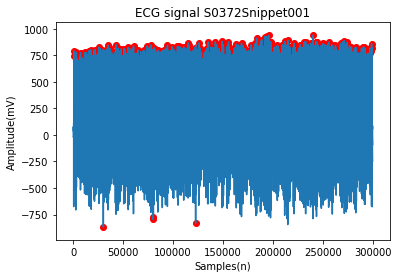

In snippet folder Snippet002


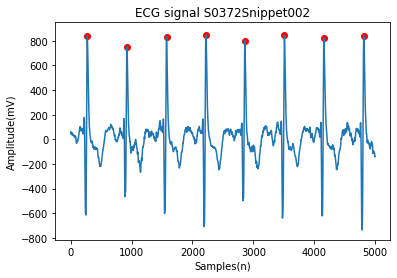

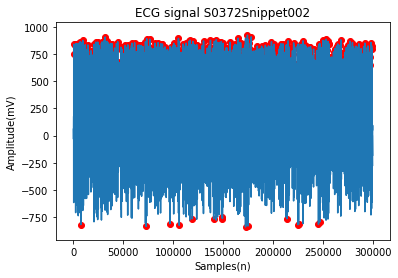





 58%|███████████████████████████████████████████████▍                                  | 33/57 [01:26<01:28,  3.70s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder Snippet000


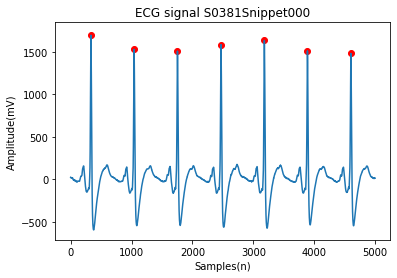

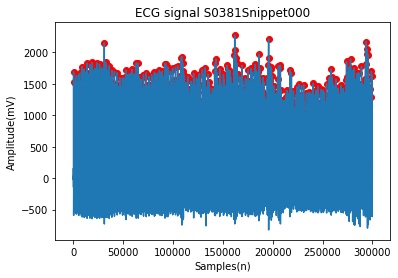

In snippet folder Snippet001


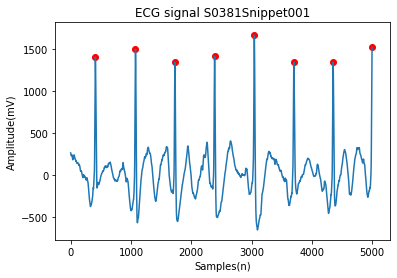

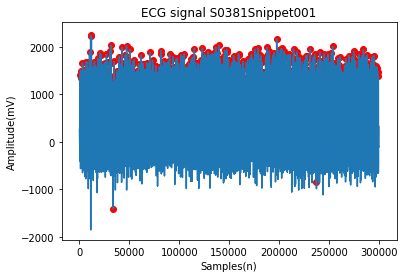

In snippet folder Snippet002


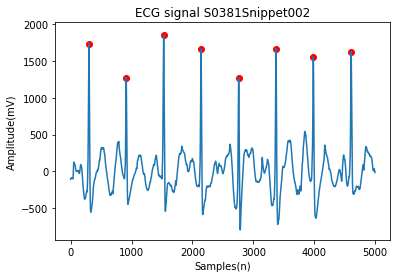

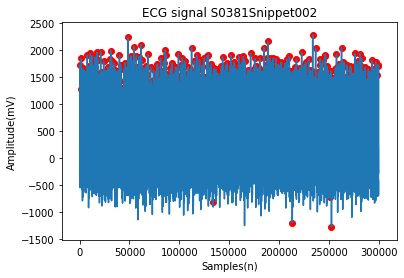





 60%|████████████████████████████████████████████████▉                                 | 34/57 [01:29<01:21,  3.54s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder Snippet000


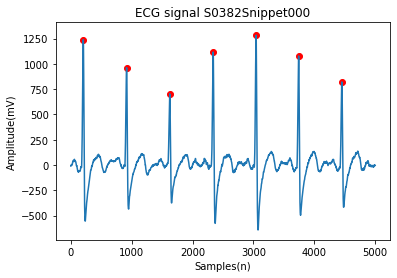

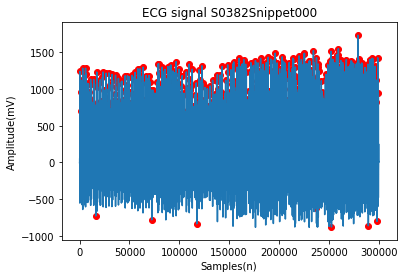





 61%|██████████████████████████████████████████████████▎                               | 35/57 [01:30<01:01,  2.78s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder Snippet000


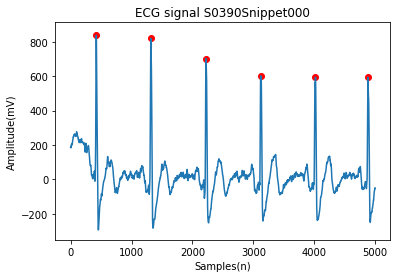

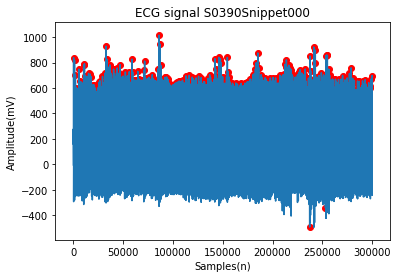

In snippet folder Snippet001


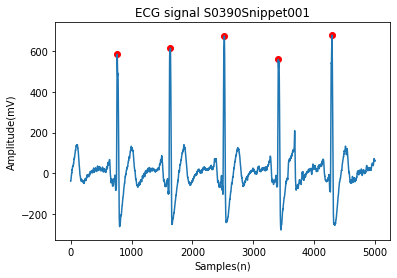

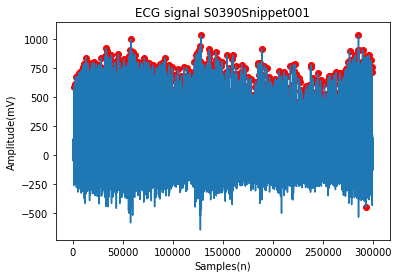

In snippet folder Snippet002


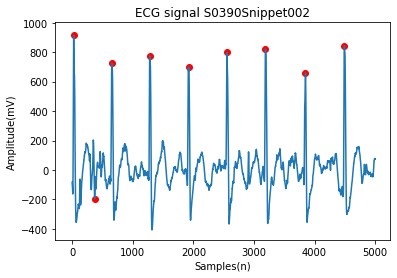

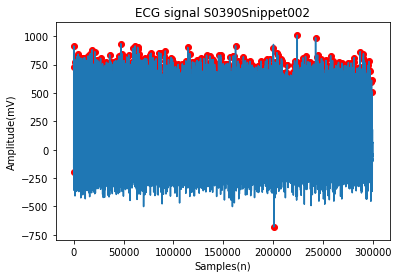





 63%|███████████████████████████████████████████████████▊                              | 36/57 [01:35<01:10,  3.37s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder Snippet000


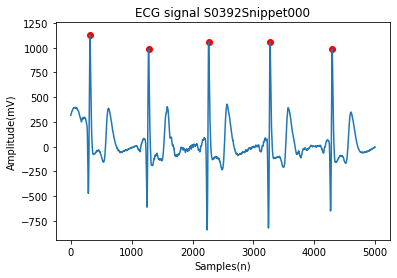

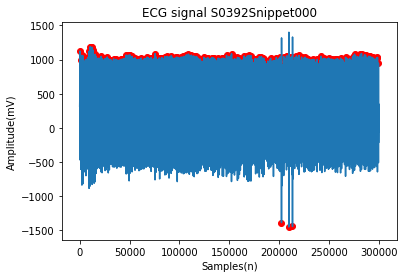

In snippet folder Snippet001


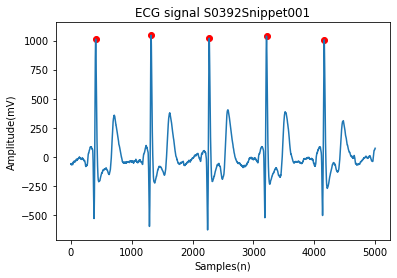

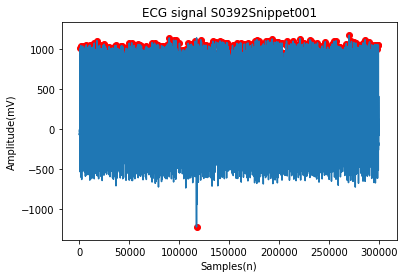

In snippet folder Snippet002


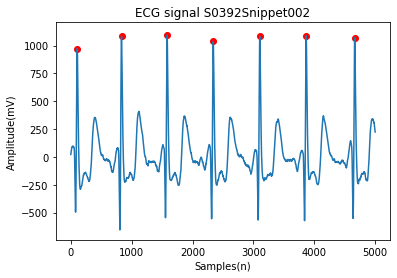

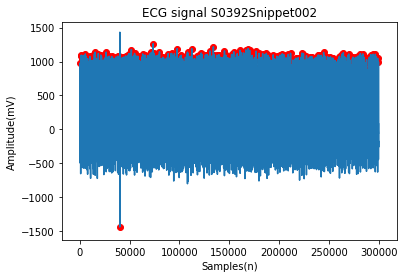





 65%|█████████████████████████████████████████████████████▏                            | 37/57 [01:40<01:14,  3.71s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder Snippet000


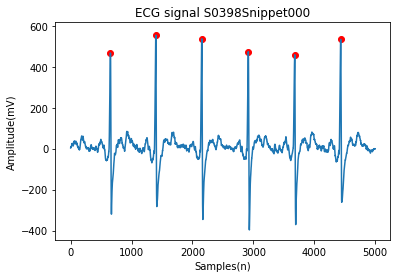

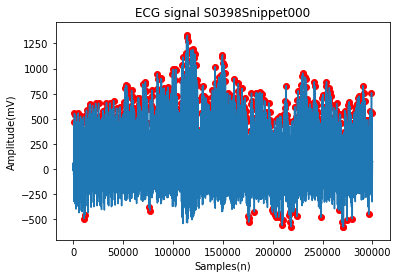

In snippet folder Snippet001


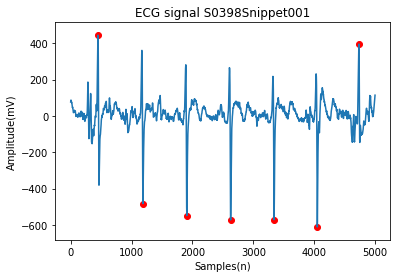

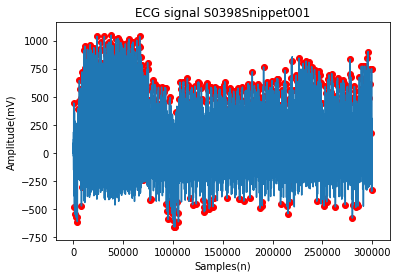





 67%|██████████████████████████████████████████████████████▋                           | 38/57 [01:42<01:02,  3.31s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder Snippet000


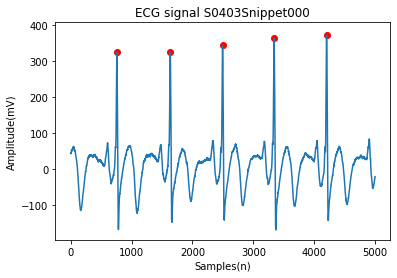

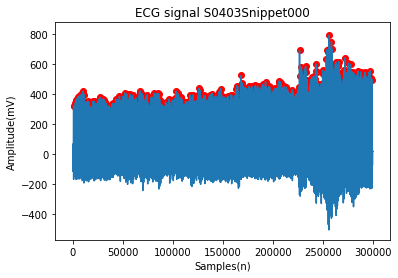

In snippet folder Snippet001


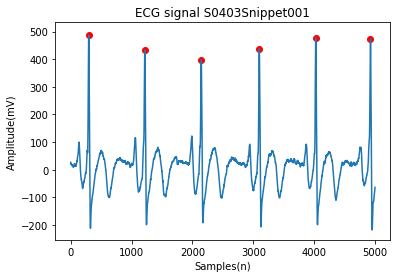

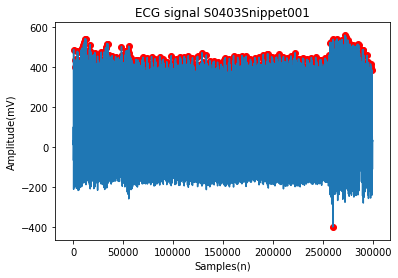

In snippet folder Snippet002


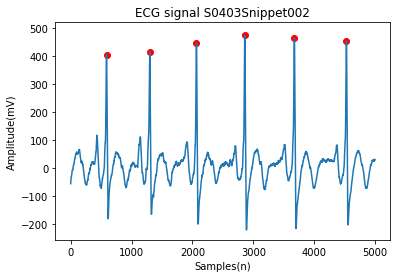

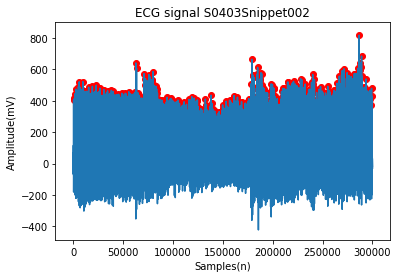

In snippet folder Snippet003


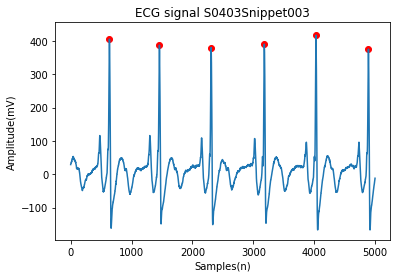

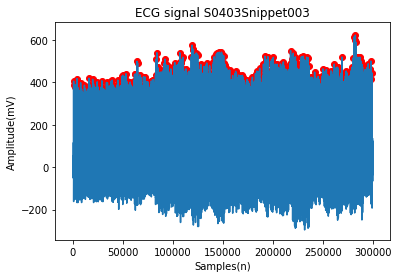

In snippet folder Snippet004


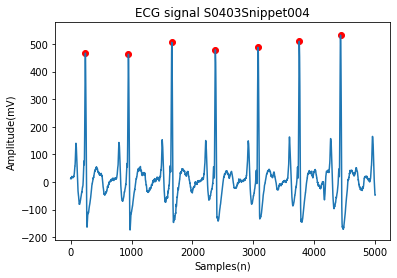

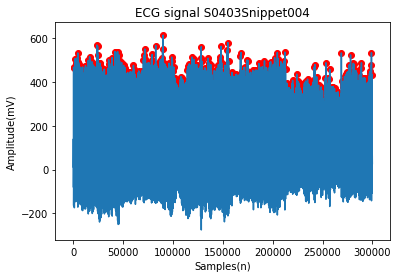





 68%|████████████████████████████████████████████████████████                          | 39/57 [01:47<01:07,  3.75s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder Snippet000


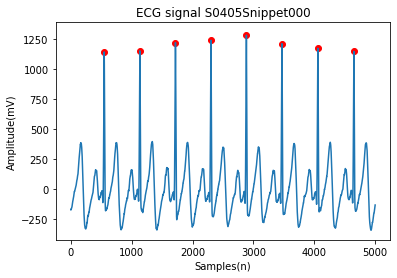

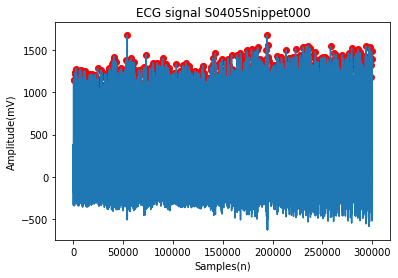

In snippet folder Snippet001


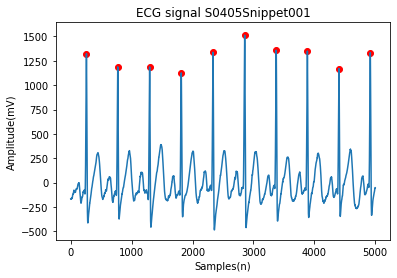

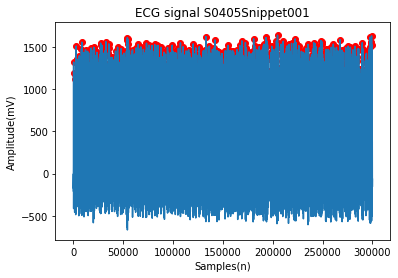

In snippet folder Snippet002


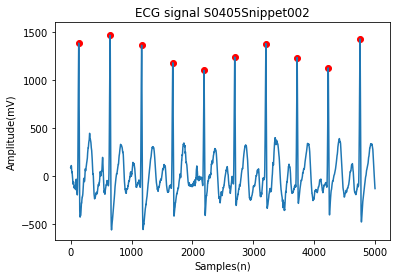

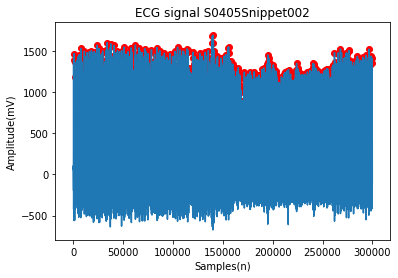





 70%|█████████████████████████████████████████████████████████▌                        | 40/57 [01:50<01:03,  3.74s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder Snippet000


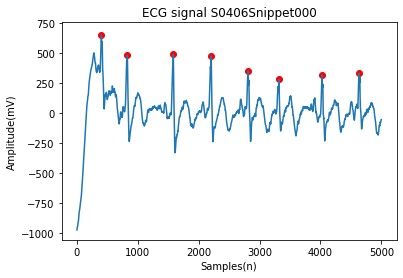

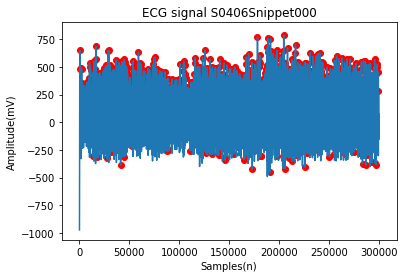

In snippet folder Snippet001


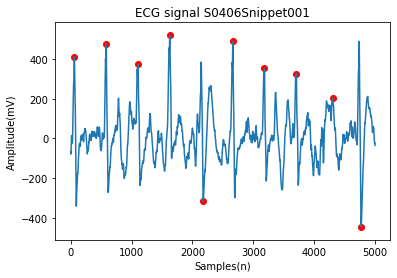

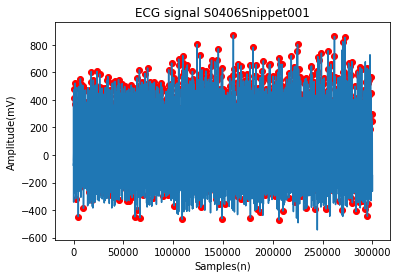

In snippet folder Snippet002


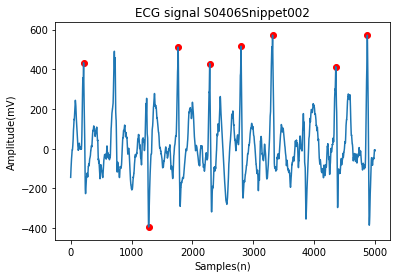

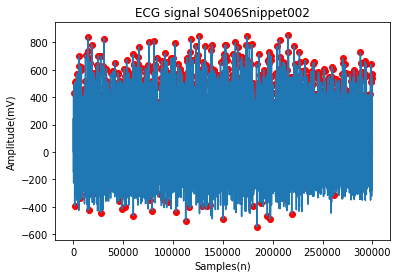





 72%|██████████████████████████████████████████████████████████▉                       | 41/57 [01:55<01:01,  3.87s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder Snippet000


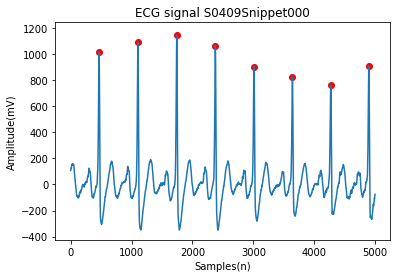

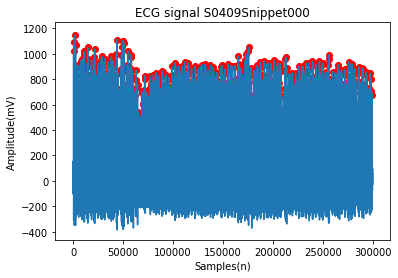





 74%|████████████████████████████████████████████████████████████▍                     | 42/57 [01:56<00:47,  3.14s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder Snippet000


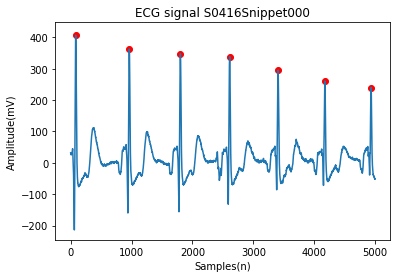

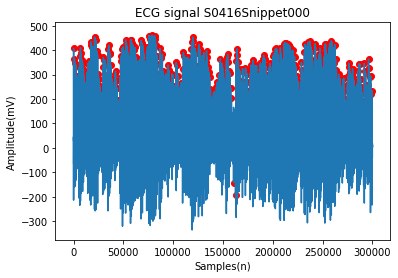

In snippet folder Snippet001


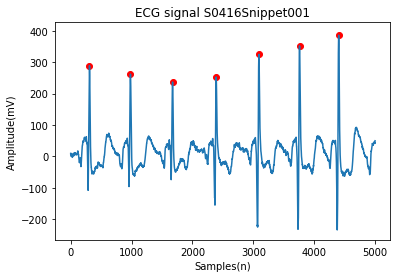

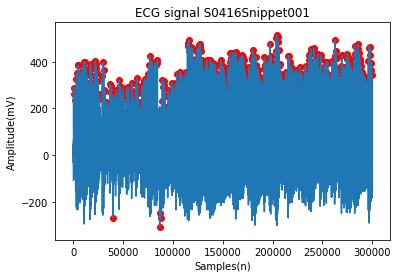

In snippet folder Snippet002


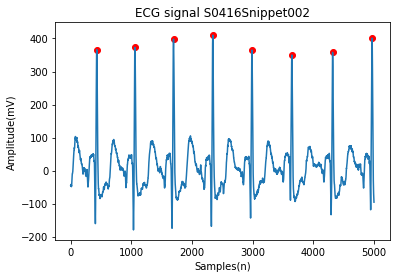

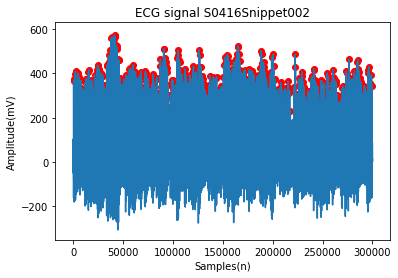

In snippet folder Snippet003


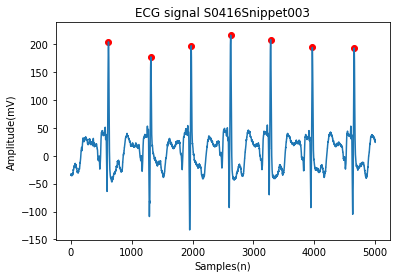

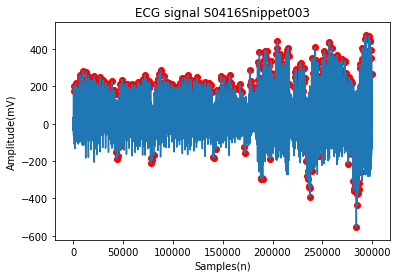

In snippet folder Snippet004


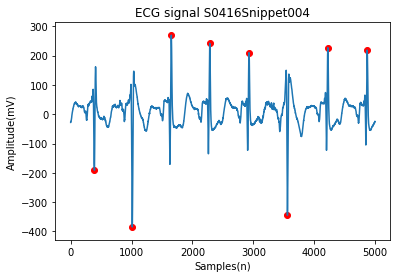

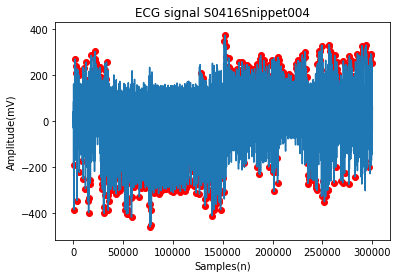





 77%|███████████████████████████████████████████████████████████████▎                  | 44/57 [02:01<00:38,  2.93s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder Snippet000


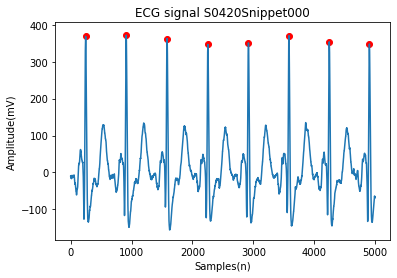

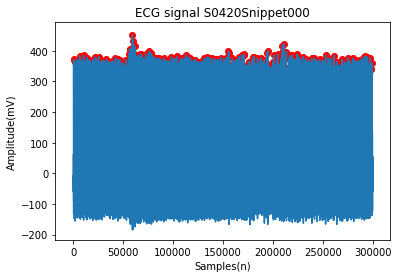

In snippet folder Snippet001


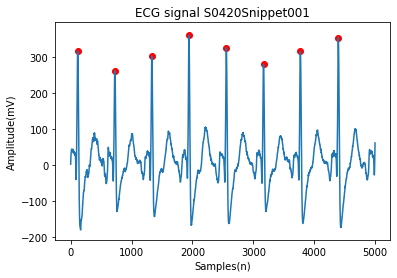

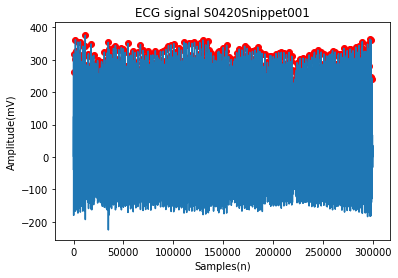

In snippet folder Snippet002


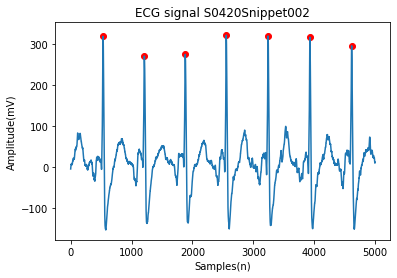

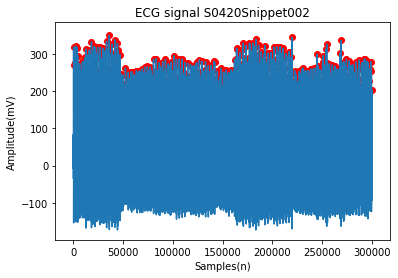

In snippet folder Snippet003


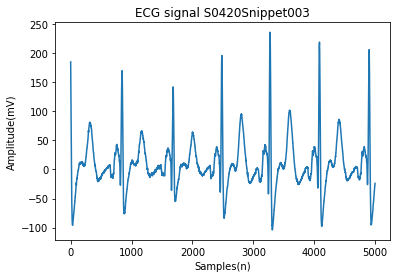

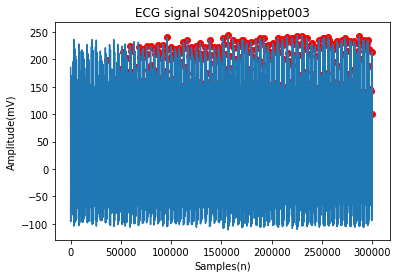

In snippet folder Snippet004


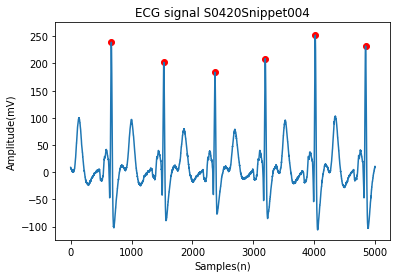

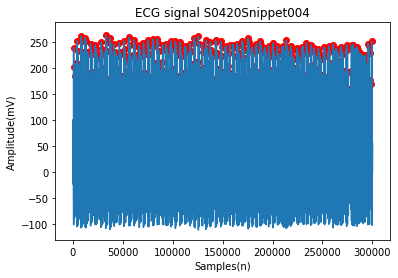





 79%|████████████████████████████████████████████████████████████████▋                 | 45/57 [02:06<00:43,  3.65s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder Snippet000


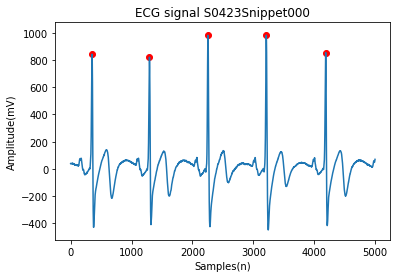

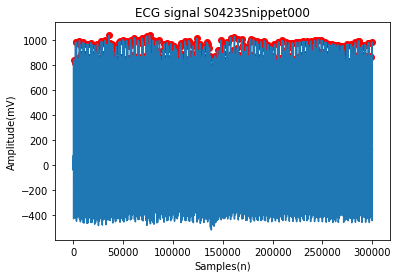

In snippet folder Snippet001


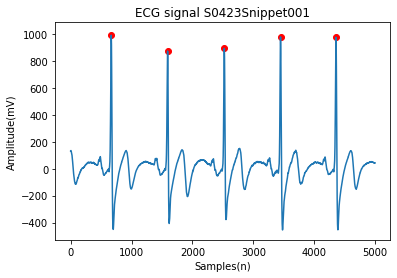

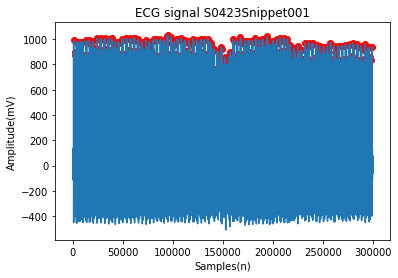

In snippet folder Snippet002


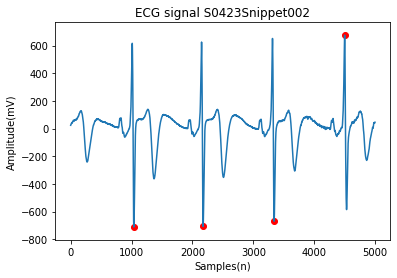

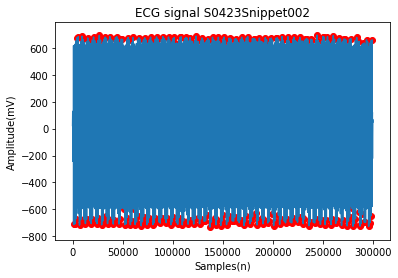

In snippet folder Snippet003


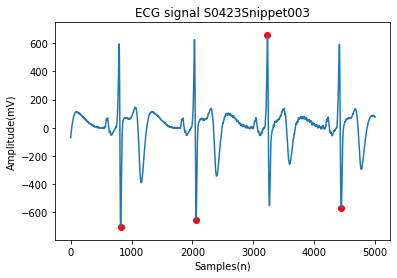

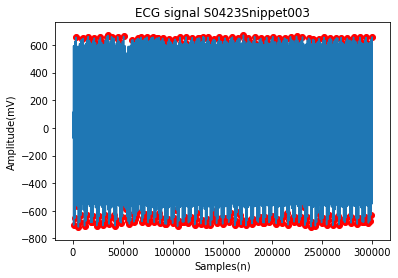

In snippet folder Snippet004


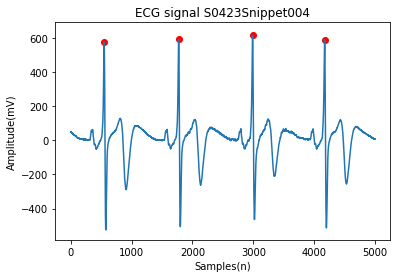

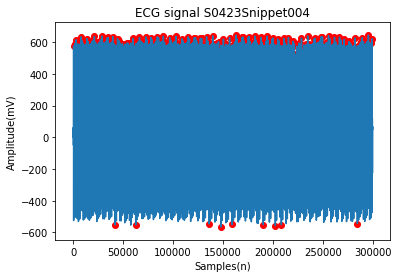





 81%|██████████████████████████████████████████████████████████████████▏               | 46/57 [02:11<00:43,  3.96s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder Snippet000


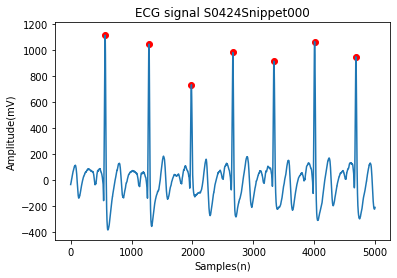

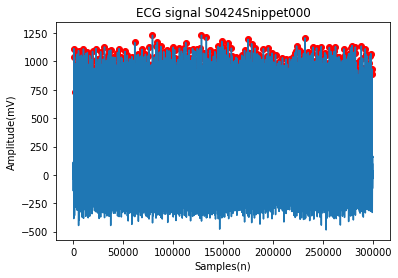

In snippet folder Snippet001


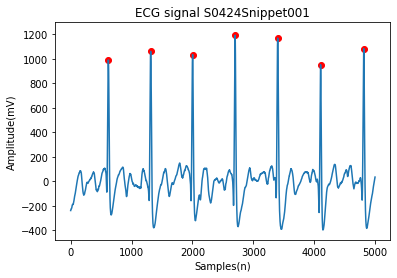

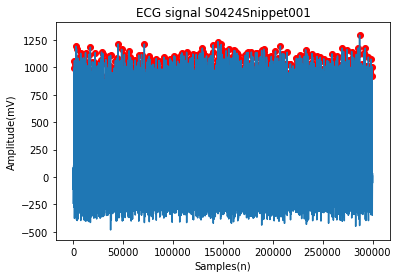





 82%|███████████████████████████████████████████████████████████████████▌              | 47/57 [02:13<00:33,  3.38s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder Snippet000


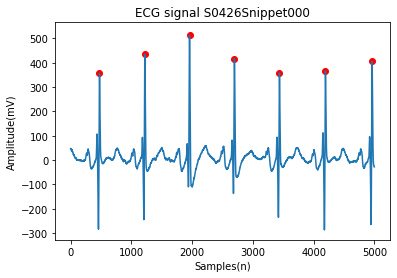

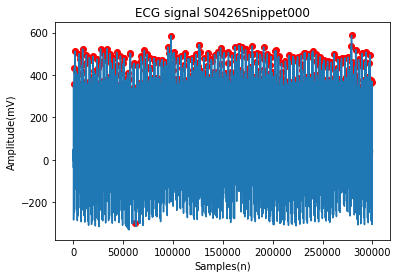

In snippet folder Snippet001


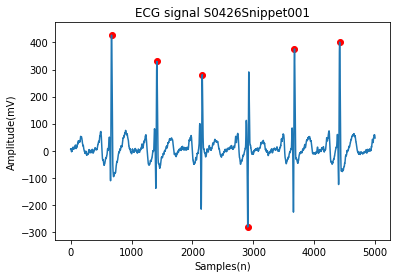

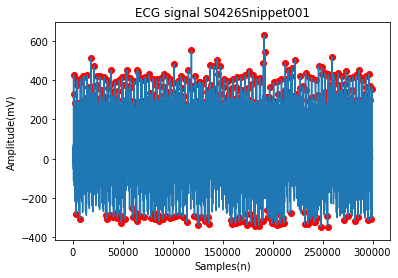

In snippet folder Snippet002


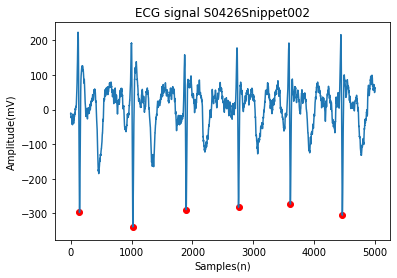

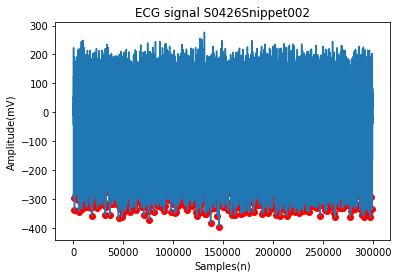

In snippet folder Snippet003


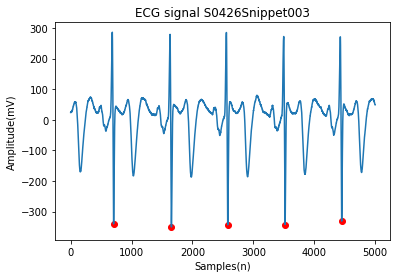

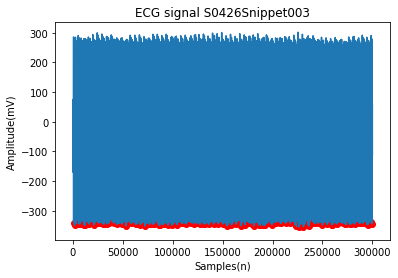

In snippet folder Snippet004


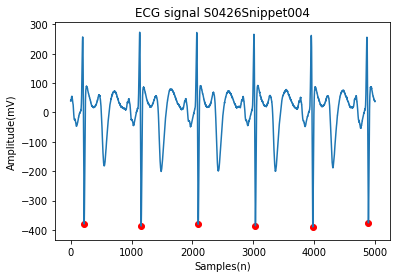

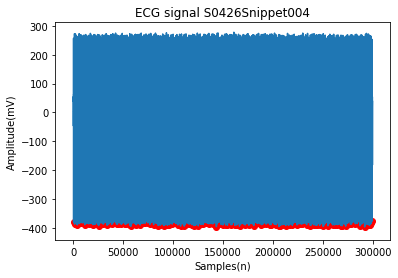





 84%|█████████████████████████████████████████████████████████████████████             | 48/57 [02:18<00:35,  3.99s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder Snippet000


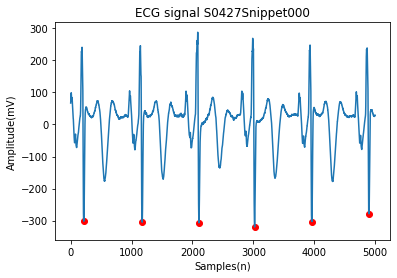

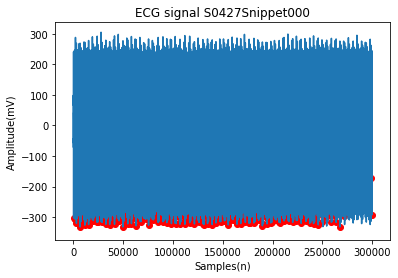

In snippet folder Snippet001


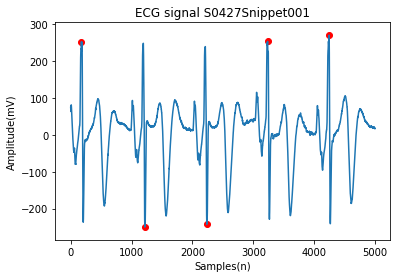

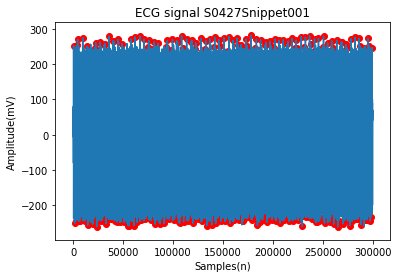

In snippet folder Snippet002


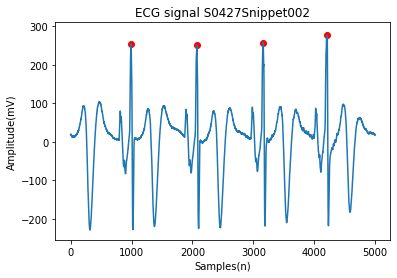

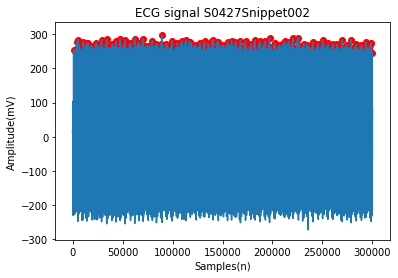

In snippet folder Snippet003


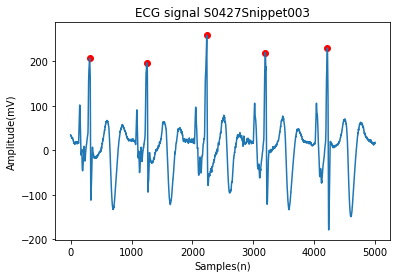

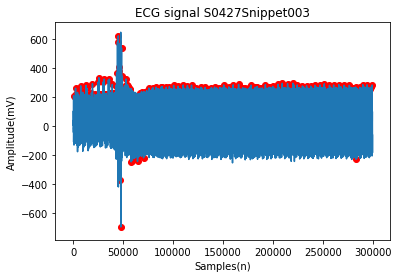

In snippet folder Snippet004


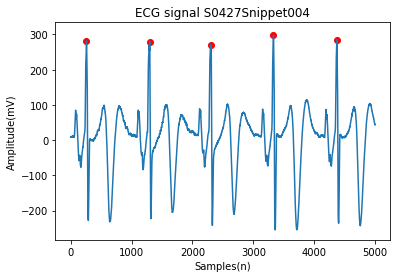

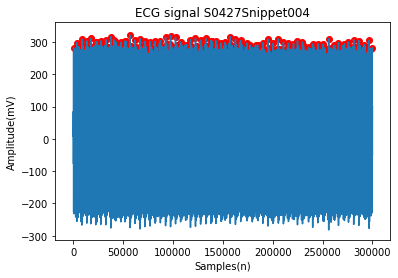





 86%|██████████████████████████████████████████████████████████████████████▍           | 49/57 [02:24<00:35,  4.38s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder Snippet000


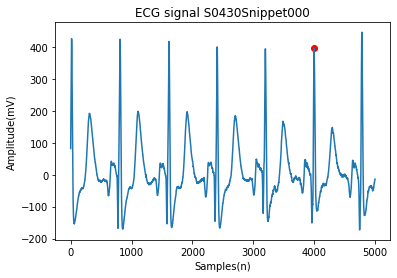

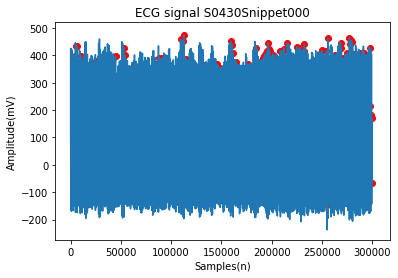

In snippet folder Snippet001


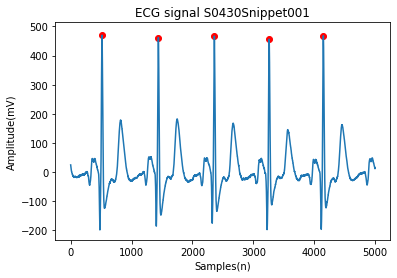

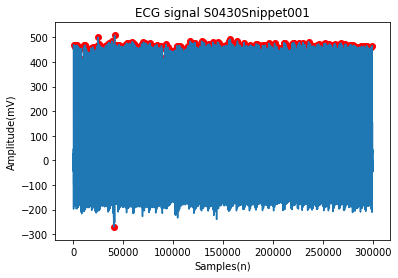

In snippet folder Snippet002


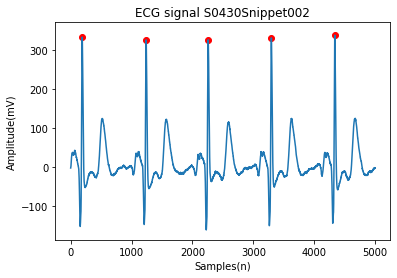

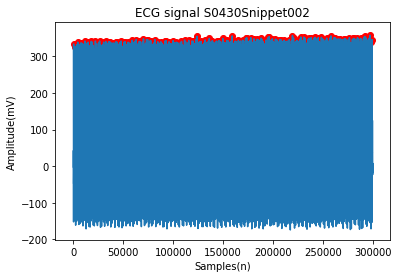

In snippet folder Snippet003


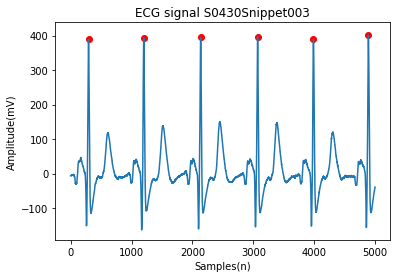

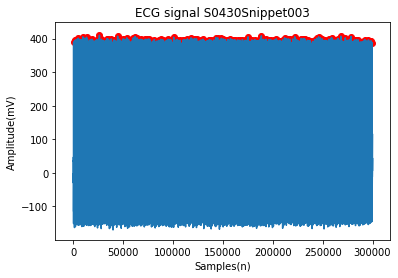

In snippet folder Snippet004


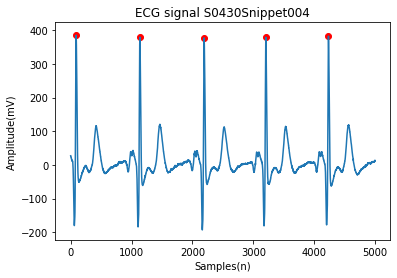

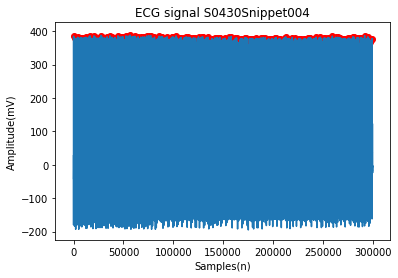





 88%|███████████████████████████████████████████████████████████████████████▉          | 50/57 [02:30<00:34,  4.91s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta (1).json
In snippet folder Meta.json
In snippet folder Snippet000


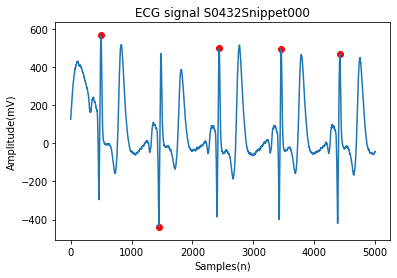

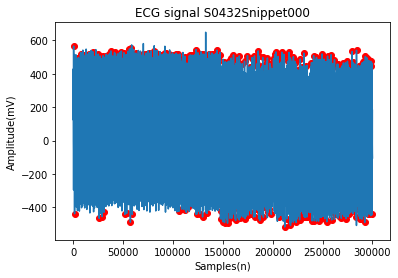

In snippet folder Snippet001


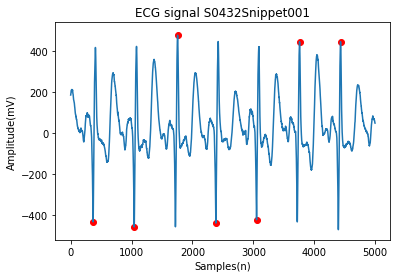

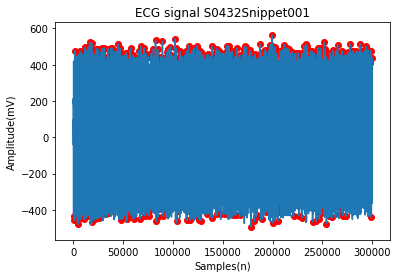

In snippet folder Snippet002


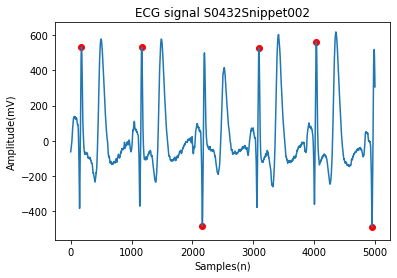

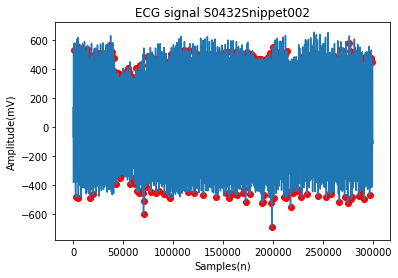

In snippet folder Snippet003


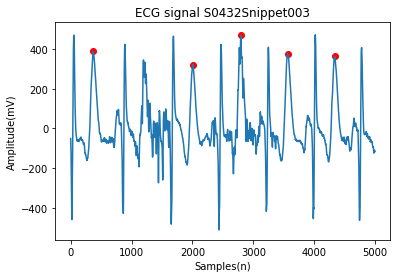

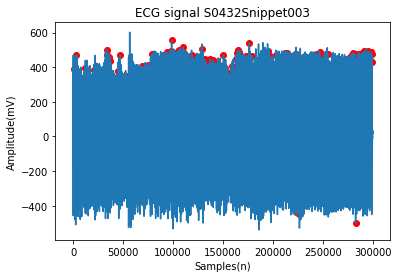

In snippet folder Snippet004


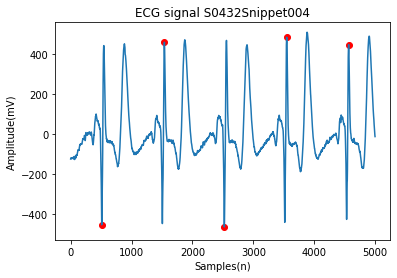

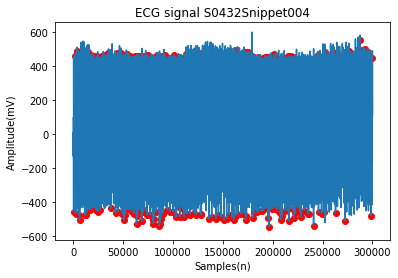





 89%|█████████████████████████████████████████████████████████████████████████▎        | 51/57 [02:37<00:33,  5.62s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta (1).json
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta (1).json
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta (1).json
In snippet folder Meta.json
In snippet folder Snippet000


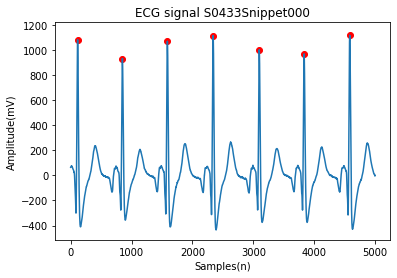

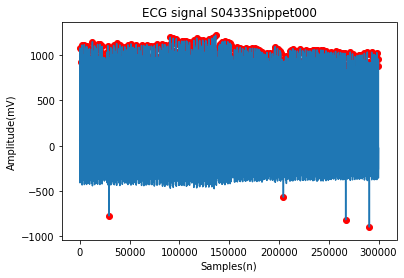

In snippet folder Snippet001


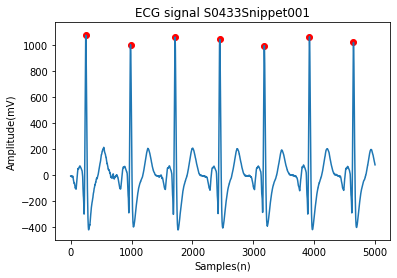

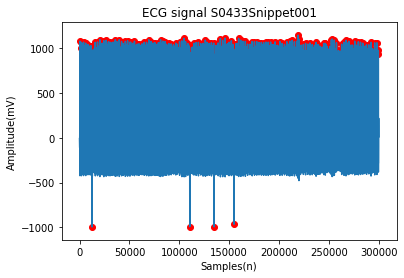

In snippet folder Snippet002


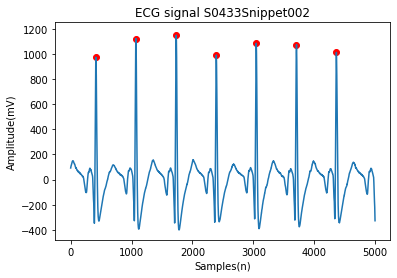

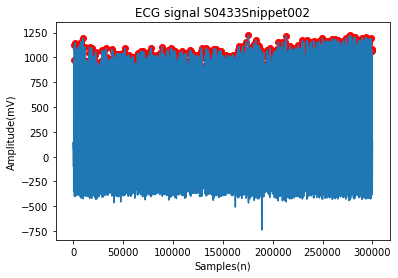

In snippet folder Snippet003


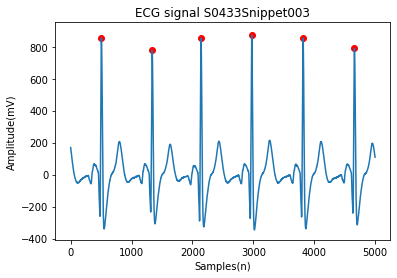

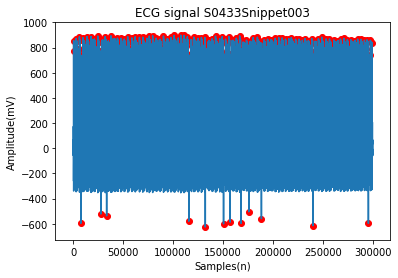

In snippet folder Snippet004


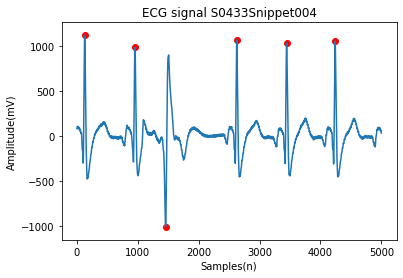

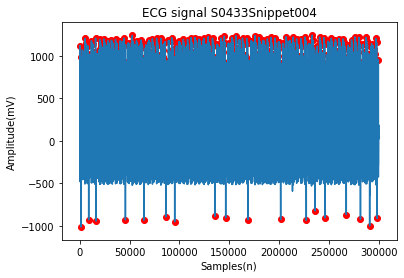





 91%|██████████████████████████████████████████████████████████████████████████▊       | 52/57 [02:43<00:28,  5.75s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder Snippet000


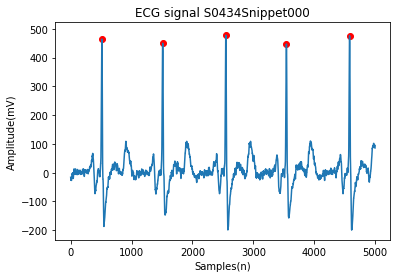

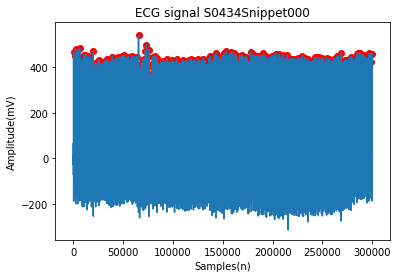

In snippet folder Snippet001


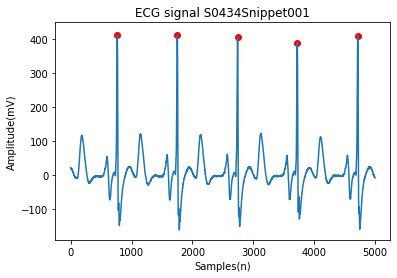

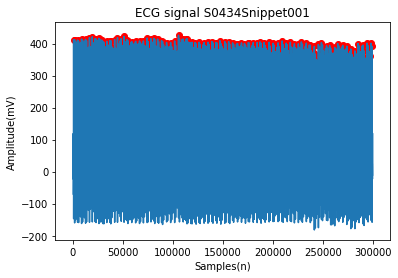

In snippet folder Snippet002


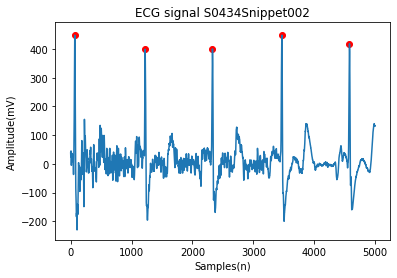

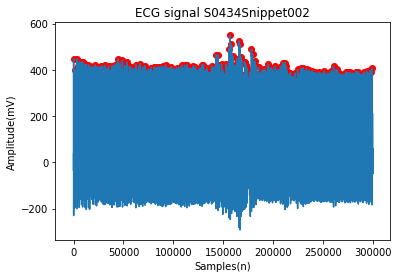

In snippet folder Snippet003


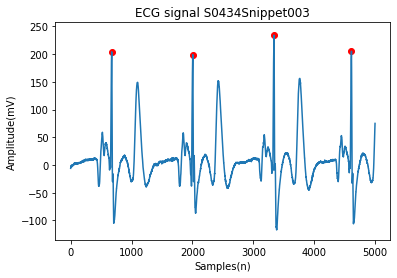

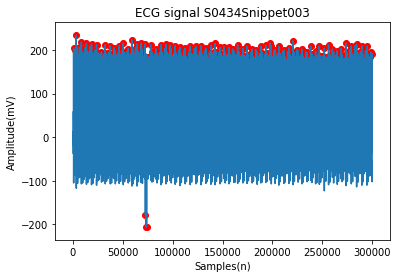

In snippet folder Snippet004


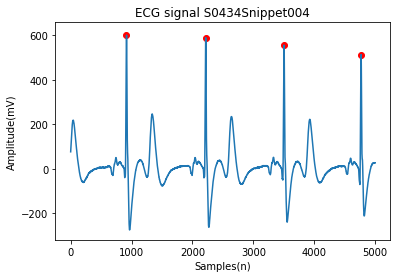

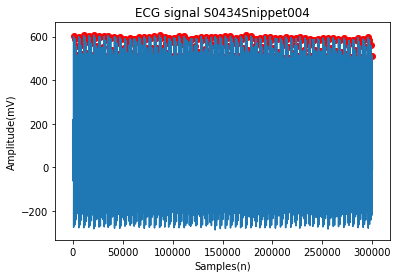





 93%|████████████████████████████████████████████████████████████████████████████▏     | 53/57 [02:48<00:22,  5.54s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder Snippet000


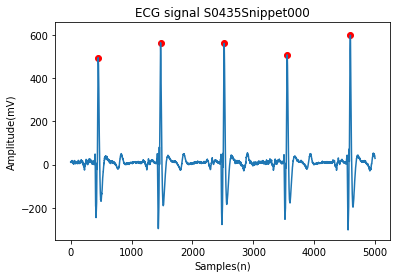

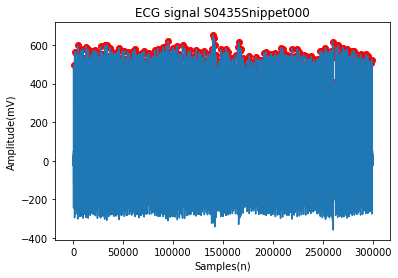

In snippet folder Snippet001


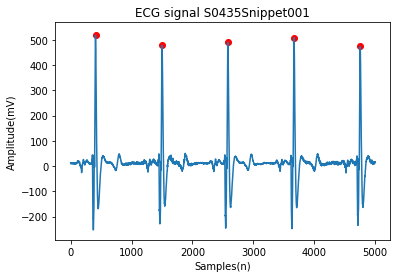

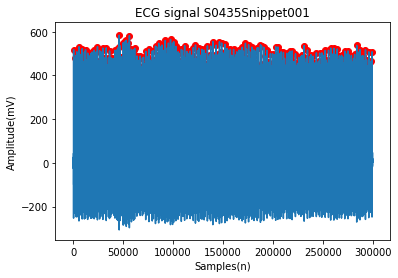

In snippet folder Snippet002


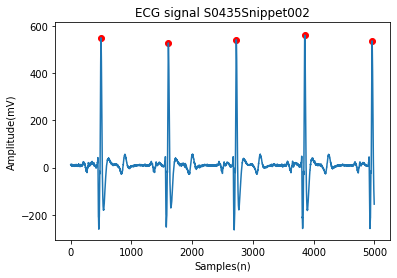

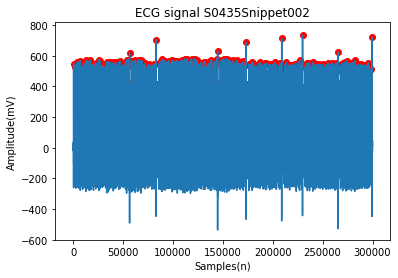

In snippet folder Snippet003


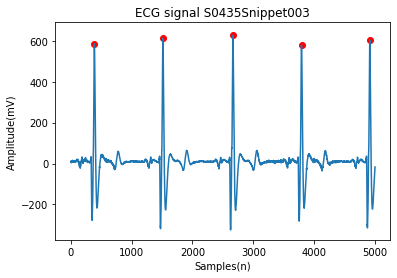

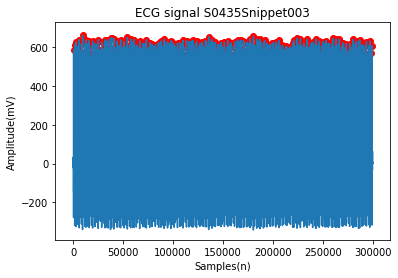

In snippet folder Snippet004


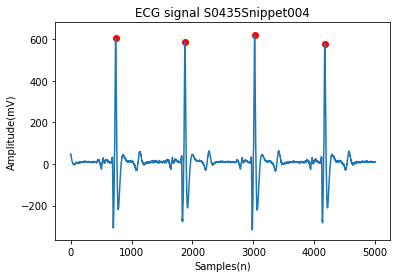

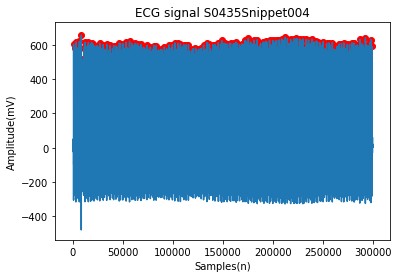





 95%|█████████████████████████████████████████████████████████████████████████████▋    | 54/57 [02:53<00:15,  5.30s/it]

In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder desktop.ini
In snippet folder ECG.ftr
In snippet folder Meta.json
In snippet folder Snippet000


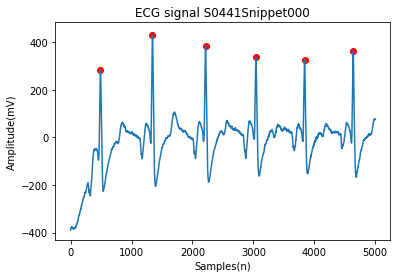

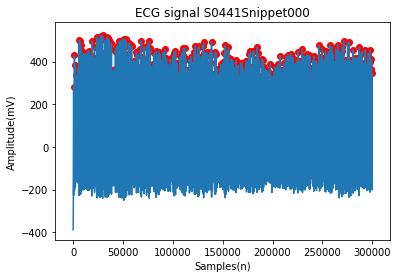

In snippet folder Snippet001


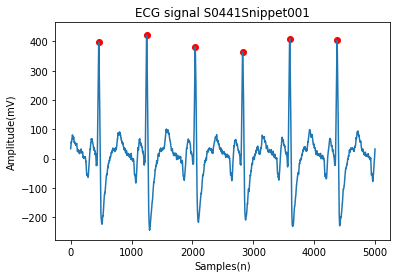

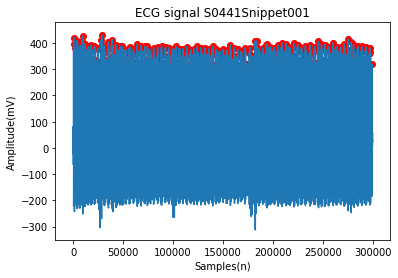

In snippet folder Snippet002


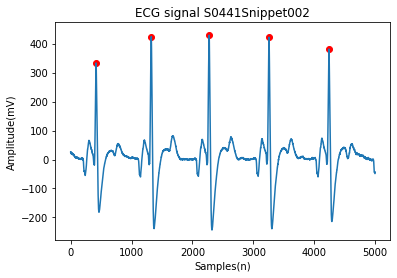

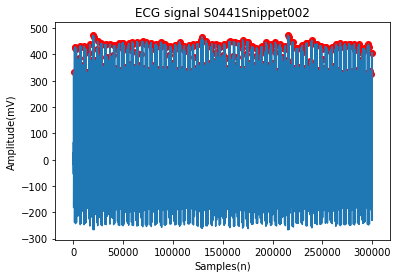

In snippet folder Snippet003


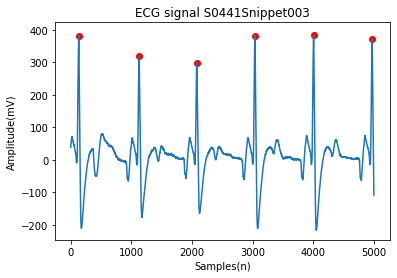

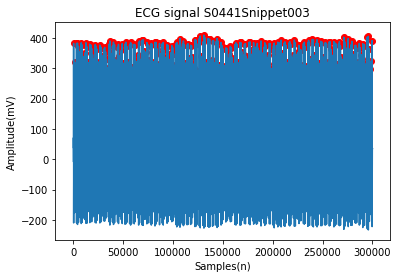

In snippet folder Snippet004


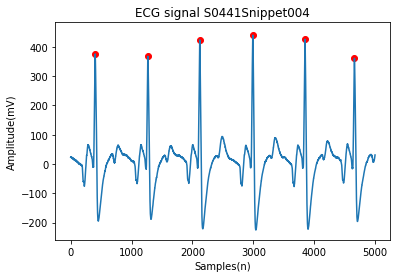

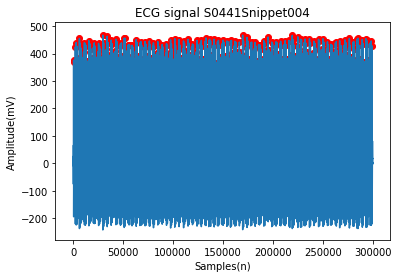





100%|██████████████████████████████████████████████████████████████████████████████████| 57/57 [02:58<00:00,  3.14s/it]

In snippet folder desktop.ini
155


In [14]:
# Check to see the state of the peaks
count = 0
patients = sorted(os.listdir(root))
for pat in tqdm(patients):     #Looping throught the folder Sxxxx
    if not pat.endswith(('.json', 'ini','\r')):
        path_pat = root+'/'+pat
        folders = sorted(os.listdir(path_pat))
        for folder in folders:    #Looping through the different ecg types 
            if not folder.endswith('.ini') and folder != 'Icon\r':
                path_folder = path_pat + '/' +folder   
                snippets = sorted(os.listdir(path_folder))
                samplingRate = find_rate(path_folder)
                for snip_folder in snippets:  #Looping through the snippet folders
                    print("In snippet folder " + snip_folder)
                    if not snip_folder.endswith(('.json', '.ftr', '.ini','\r')):
                        path_snip =path_folder + '/' + snip_folder
                        df = pd.read_feather(path_snip + '/MSNIP.ftr')
                        df_signal = df['ecg_0']
                        df_peaks = pd.read_feather(path_snip + '/PEAKS.ftr')
                        
                        y_values = []
                        for point in df_peaks['x_values']:
                            if point >= 0 and point < 5000:
                                y_values.append(df_signal[point])
                    
                        #print(y_values)
                        #print(df_peaks[df_peaks['x_values'] < 5000])

                        plt.plot(df_signal[0:5000])
                        plt.title('ECG signal ' + pat + snip_folder)
                        plt.xlabel('Samples(n)')
                        plt.ylabel('Amplitude(mV)')
                        plt.scatter(df_peaks[df_peaks['x_values'] < 5000]['x_values'],y_values,marker='o',c='red')
                        plt.show()
                        
                        plt.plot(df_signal)
                        plt.title('ECG signal ' + pat + snip_folder)
                        plt.xlabel('Samples(n)')
                        plt.ylabel('Amplitude(mV)')
                        plt.scatter(df_peaks['x_values'],df_peaks['y_values'],marker='o',c='red')
                        plt.show()
                        count += 1
                        
print(count)

## Checking snippets for accurate peak detection

In [4]:
%matplotlib notebook

<IPython.core.display.Javascript object>


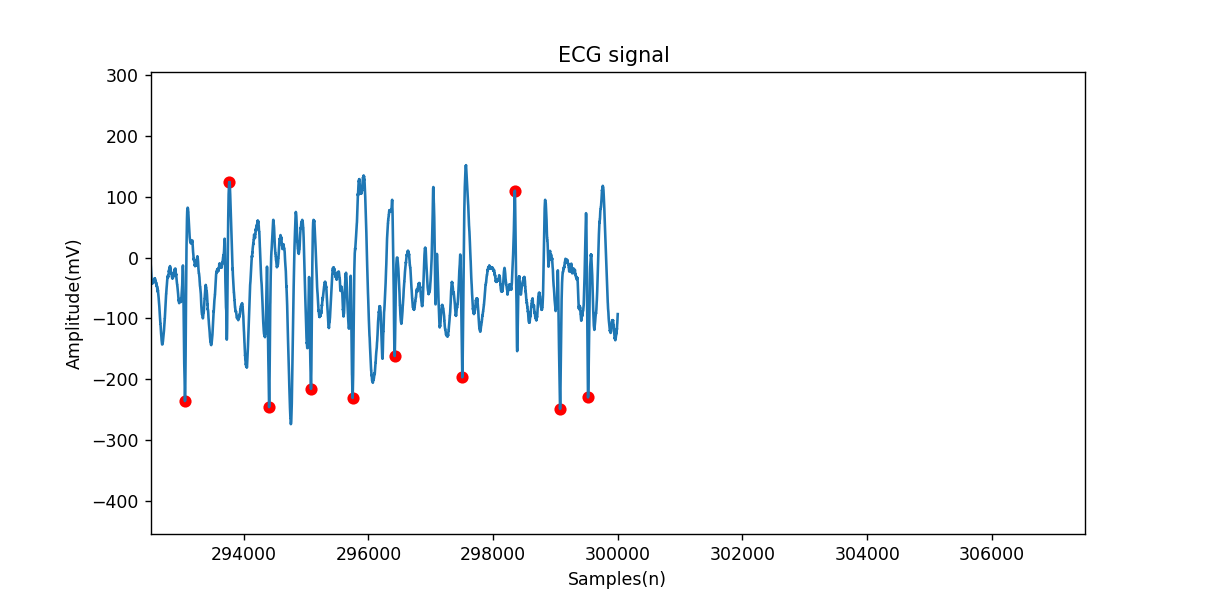

In [7]:
path_snip = root + "\\S0256\\holter\\Snippet000"
df = pd.read_feather(path_snip + '/MSNIP.ftr')
df_signal = df['ecg_0']
df_peaks = pd.read_feather(path_snip + '/PEAKS.ftr')
                        
                          
plt.plot(df_signal)
plt.title('ECG signal ')
plt.xlabel('Samples(n)')
plt.ylabel('Amplitude(mV)')
plt.scatter(df_peaks['x_values'],df_peaks['y_values'],marker='o',c='red')
plt.show()

In [9]:
# Definitely bad snippets
badApples = ["\\S0282\\holter\\Snippet002","\\S0296\\holter\\Snippet000","\\S0296\\holter\\Snippet001","\\S0296\\holter\\Snippet002","\\S0366\\holter\\Snippet001","\\S0366\\holter\\Snippet002","\\S0406\\holter\\Snippet001","\\S0406\\holter\\Snippet002","\\S0430\\holter\\Snippet000","\\S0432\\holter\\Snippet003"]

In [10]:
# Flagging the snippets with bad peak detection
for snip in badApples:
    snip_path = root + snip
    
    data = {'Error Flag': True, 'Error Type': 'Badly detected peaks (through manual inspection)'}
        
    with open((snip_path + '/PeakMeta.json'), "w") as outfile:
        json.dump(data, outfile)
        outfile.close()
    